In [94]:
import numpy as np
import scanpy as sc
import os
import anndata
#from methods import *
import matplotlib.pyplot as plt
import scipy
from matplotlib.pyplot import figure
import copy
import json
import gseapy
from gseapy import enrichr
from mpmath import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA


In [95]:
import umap

In [96]:
import numpy as np
hvmask = np.load('hvmask.npy')
hvmask.sum()

4053

In [4]:

pids=[]
f = open('sids.txt','r')
lines=f.readlines()
for l in lines:
    pids.append(l.strip())


In [5]:

reprefile = 'training_rec/init_representatives_4.txt'    #'uncertainty2_representatives.txt'
clusterfile = 'training_rec/init_cluster_labels_4.txt'      #'uncertainty2_cluster_labels.txt'

f= open(reprefile,'r')
lines=f.readlines()
init_representatives=[]
for l in lines:
    init_representatives.append(int(l.strip().split()[0]))
f.close()

f= open(clusterfile,'r')
init_cluster_labels=[]
lines=f.readlines()
for l in lines:
    init_cluster_labels.append(int(l.strip().split()[0]))
f.close()

In [6]:
hvmask = np.load('hvmask.npy')
hvset = np.load('hvset.npy')

In [7]:
bdata = anndata.read_h5ad('normed_reduced_bulk.h5ad')
bdata = bdata[:,hvmask]

In [8]:
bdata

View of AnnData object with n_obs × n_vars = 112 × 4053
    obs: 'sampleid'
    var: 'gene_symbols', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [9]:
import matplotlib.cm as cm
X = np.array(bdata.obsm['X_pca'])
silhouette_scores = []

for n_clusters in range(4,112,4):
    # Create a subplot with 1 row and 2 columns
    '''
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])'''

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(bdata.obsm['X_pca'])
    cluster_labels = clusterer.labels_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    silhouette_scores.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    '''
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()'''

For n_clusters = 4 The average silhouette_score is : 0.17299065
For n_clusters = 8 The average silhouette_score is : 0.144259
For n_clusters = 12 The average silhouette_score is : 0.116426595
For n_clusters = 16 The average silhouette_score is : 0.1313747
For n_clusters = 20 The average silhouette_score is : 0.15033709
For n_clusters = 24 The average silhouette_score is : 0.16782573
For n_clusters = 28 The average silhouette_score is : 0.17676924
For n_clusters = 32 The average silhouette_score is : 0.19888149
For n_clusters = 36 The average silhouette_score is : 0.20032917
For n_clusters = 40 The average silhouette_score is : 0.21922612
For n_clusters = 44 The average silhouette_score is : 0.22411142
For n_clusters = 48 The average silhouette_score is : 0.21955554
For n_clusters = 52 The average silhouette_score is : 0.23511274
For n_clusters = 56 The average silhouette_score is : 0.23715803
For n_clusters = 60 The average silhouette_score is : 0.22676863
For n_clusters = 64 The avera

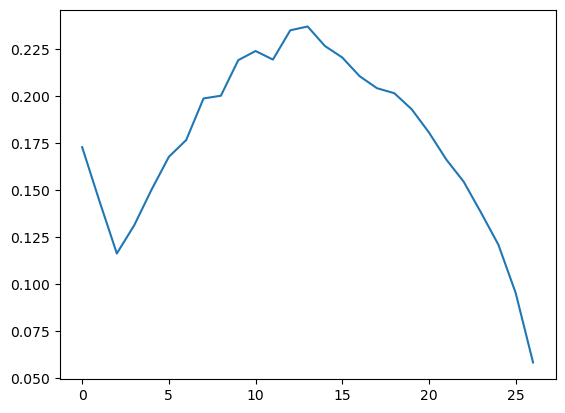

In [10]:
plt.plot(silhouette_scores)

In [9]:
pnum = 36
rnd = int(pnum/4)
reprefile = 'active_training_rec/eer_representatives_'+str(rnd)+'.txt'    #6000genebackup/
#'eer_representatives_'+str(rnd)+'.txt' #'init_representatives_4.txt'    #'uncertainty2_representatives.txt'
clusterfile = 'active_training_rec/eer_cluster_labels_'+str(rnd)+'.txt'
#'eer_cluster_labels_'+str(rnd)+'.txt' #'init_cluster_labels_4.txt'      #'uncertainty2_cluster_labels.txt'

f= open(reprefile,'r')
lines=f.readlines()
representatives=[]
for l in lines:
    representatives.append(int(l.strip().split()[0]))
f.close()

f= open(clusterfile,'r')
cluster_labels=[]
lines=f.readlines()
for l in lines:
    cluster_labels.append(int(l.strip().split()[0]))
f.close()

In [138]:
## load and pca together
import timeit 

t_start = timeit.default_timer()

#representatives = new_representatives#init_representatives  # newrepre
#cluster_labels = new_cluster_labels  #init_cluster_labels #nlabels

patient_id = []
sample_origin = []
celltypes = []
pcelltypes=[]
sample_ids=[]

gts=[]
semis=[]
semist = []

semipids=[]
semisids=[]
semi_sample_origin=[]
for i in range(len(pids)):
    pid = pids[i]
    adata = anndata.read_h5ad('sample_sc/'+pids[i]+'.h5ad')
    celltype = np.array(adata.obs['cell.type'])

    sample_origin.append(np.array(adata.obs['sample.origin']))
    patient_id.append(np.array(adata.obs['patient.ID']))

    for j in range(adata.X.shape[0]):
        sample_ids.append(pid)
    
    gts.append(np.log1p(np.array(adata.X.todense())))
    repre = representatives[cluster_labels[i]]
    reprepid = pids[repre]
    if reprepid==pid:
        semis.append(np.log1p(np.array(adata.X.todense())))
    else:
        xsem = np.load('semidata/fast'+ reprepid+'_to_'+pid+'.npy') # 6000genebackup/
        xsem = xsem*(xsem>10)
        semis.append(np.log1p(xsem))
        
    for j in range(semis[-1].shape[0]):
        semipids.append(patient_id[-1][0])
        semisids.append(pid)
        semi_sample_origin.append(sample_origin[-1][0])
        
        
    bdata = semisdata[semisdata.obs['sample_ids'] == pid]
    pcelltype = np.array(bdata.obs['celltypes'])
    
    pcelltypes.append(np.array(pcelltype))
    celltypes.append(np.array(celltype))
    print(i,end=', ')


t_end = timeit.default_timer()
print()
print(str(t_end-t_start),'seconds')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 
207.79681262996746 seconds


In [11]:
for i in range(112):
    if semis[i].shape[1] == len(hvmask):
        semis[i] = semis[i][:,hvmask]
    if gts[i].shape[1] == len(hvmask):
        gts[i] = gts[i][:,hvmask]
    if semis[i].shape[1] != 4053:
        semis[i] = semis[i][:,:4053]
    if gts[i].shape[1] != 4053:
        gts[i] = gts[i][:,:4053]

In [12]:
for i in range(112):
    if semis[i].max()>10:
        print(i)
    if gts[i].max()>10:
        print(i)

In [13]:
for i in range(112):
    if semis[i].max()<3:
        print(i)
    if gts[i].max()<3:
        print(i)

In [16]:
gtdata = anndata.AnnData(np.concatenate(gts,axis=0))
gtdata.var = adata.var[hvmask]
gtdata.obs['patient_ids'] = np.concatenate(patient_id,axis=0) 
gtdata.obs['celltypes'] = np.concatenate(celltypes,axis=0)
gtdata.obs['sample_ids'] = sample_ids
gtdata.obs['sample_origin'] = np.concatenate(sample_origin,axis=0)

semisdata = anndata.AnnData(np.concatenate(semis,axis=0))
semisdata.var = adata.var[hvmask]
semisdata.obs['patient_ids'] = semipids
semisdata.obs['sample_ids'] = semisids
semisdata.obs['sample_origin'] = (semi_sample_origin)



In [26]:
## PCA  # no need if with dim alldata is loaded
t_start = timeit.default_timer()

xsemis = np.concatenate(semis,axis=0)
X = np.concatenate([np.concatenate(gts,axis=0),xsemis],axis=0) #semidata.X],axis=0)
reducer =  PCA(n_components=100)#TruncatedSVD(n_components=100) 
X_reduced = reducer.fit_transform(X)

t_end = timeit.default_timer()
print()
print(str(t_end-t_start),'seconds')


29.08907176484354 seconds


In [27]:
# get length of gt and semi
offset=0
lengt = 0
gtpids = []
for i in range(len(pids)):
    offset = offset+gts[i].shape[0]
    for j in range(gts[i].shape[0]):
        gtpids.append(pids[i])
lengt = offset
semipids = []
for i in range(len(pids)):
    offset = offset+semis[i].shape[0]
    for j in range(semis[i].shape[0]):
        semipids.append(pids[i])
totallen = offset
lensemi = totallen-lengt

In [19]:
### umap  # no need if with dim alldata is loaded
t_start = timeit.default_timer()
import umap
umap_reduc=umap.UMAP()#min_dist = 0.5, n_neighbors = 50)
X_UMAP = umap_reduc.fit_transform(X_reduced)
t_end = timeit.default_timer()
print()
print(str(t_end-t_start),'seconds')


433.7487296300242 seconds


In [42]:
gtdata.obsm['X_pca'] = X_reduced[:lengt]
semisdata.obsm['X_pca'] = X_reduced[lengt:]
#alldata.obsm['X_umap_self'] = X_UMAP[:lengt]
#semisdata.obsm['X_umap_self'] = X_UMAP[lengt:]

In [19]:
semisdata = anndata.read_h5ad('semisdata_repmask930.h5ad')

In [75]:
semisdata

AnnData object with n_obs × n_vars = 221502 × 4053
    obs: 'patient_ids', 'sample_ids', 'sample_origin', 'repmask', 'celltypes', 'neuron_differentiation_score'
    var: 'gene_symbols'
    uns: 'celltypes_colors', 'celltypes_sizes', 'neighbors', 'paga', 'rank_genes_groups', 'repmask_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


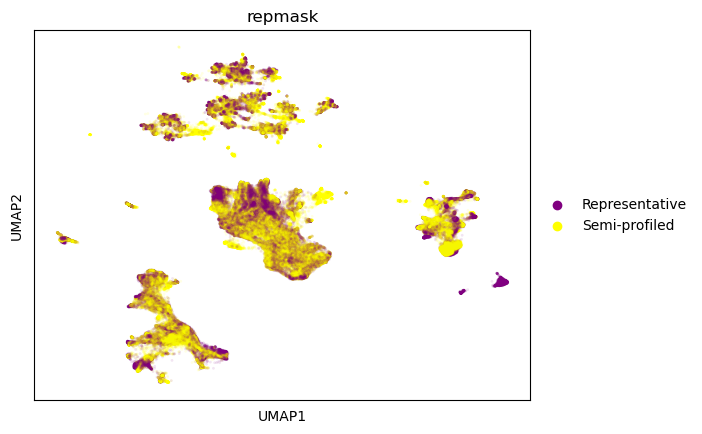

In [24]:
#semisdata.obs['repmask'] = np.array(semirepmask).astype('str')

pointsize = 120000 / semisdata.X.shape[0] * 30
#color_map = 'magma'

palette = {'Representative':'purple','Semi-profiled':'yellow'}
sc.pl.umap(semisdata,color = 'repmask',
           title = 'repmask',
           size = pointsize,
           palette = palette,
           save=' semisdata repmask purple.pdf',
           alpha=0.1)

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


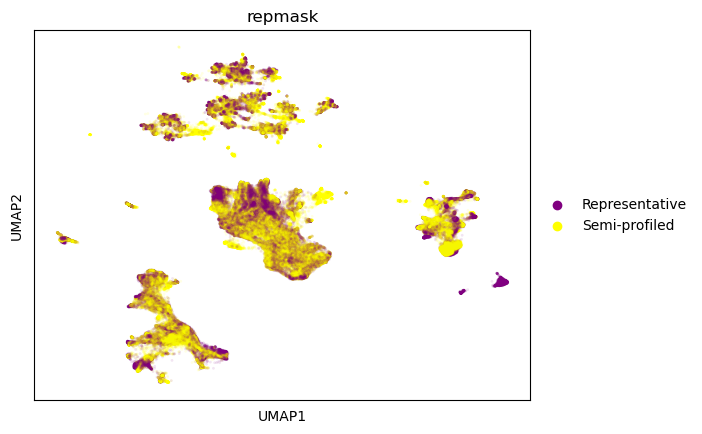

In [76]:

pointsize = 120000 / semisdata.X.shape[0] * 30
#color_map = 'magma'

palette = {'Representative':'purple','Semi-profiled':'yellow'}
sc.pl.umap(semisdata,color = 'repmask',
           title = 'repmask',
           size = pointsize,
           palette = palette,
           show=False,
           alpha=0.1)
fname = 'cancer repmask umap dpi600'
plt.savefig(fname+'.jpg', dpi=600, bbox_inches='tight')


In [25]:
batch = []
xdimgts=[]
xdimsemis=[]
repmask = []
offset=0
xused = X_reduced#X_UMAP#X_reduced#X_UMAP # X_PCA
lengt = 0
c = 0
for i in range(len(pids)):
    xdimgts.append(xused[offset:(offset+gts[i].shape[0]),:])
    offset = offset+gts[i].shape[0]
    for j in range(len(gts[i])):
        batch.append(c)
    if i in representatives:
        for j in range(len(gts[i])):
            repmask.append(1)
    else:
        for j in range(len(gts[i])):
            repmask.append(0)
    c+=1
lengt = offset
semirepmask = []
for i in range(len(pids)):
    xdimsemis.append(xused[offset:(offset+semis[i].shape[0]),:])
    offset = offset+semis[i].shape[0]
    for j in range(len(semis[i])):
        batch.append(c)
    if i in representatives:
        for j in range(len(semis[i])):
            semirepmask.append(1)
    else:
        for j in range(len(semis[i])):
            semirepmask.append(0)
    c+=1
totallen = offset
lensemi = totallen-lengt

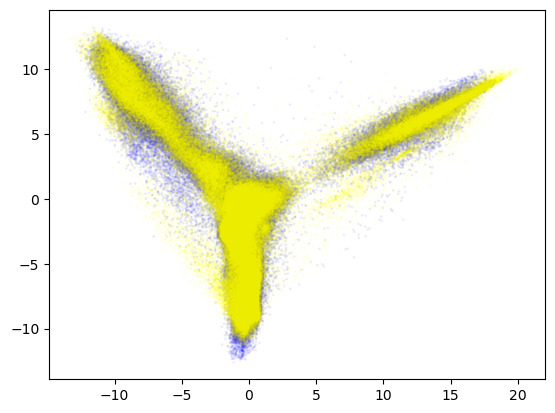

In [22]:
## not activated
color=[]
for j in range(112):
    for i in range(len(xdimgts[j])):  
        color.append('blue')
        
for j in range(112):
    for i in range(len(xdimsemis[j])):        
        color.append('yellow')

plt.scatter(xused[:,0],xused[:,1],c=color,alpha=0.05,s=1)

In [9]:
gtdata = anndata.read_h5ad('gtdata.h5ad')
semisdata = anndata.read_h5ad('semisdata.h5ad')
combdata = anndata.read_h5ad('combdata.h5ad')

In [20]:
semisdata.obsm['X_umap'] = combdata.obsm['X_umap'][len(gtdata.X):]

In [44]:
datalb = []
for i in range(gtdata.X.shape[0]):
    datalb.append('Original')
for i in range(semisdata.X.shape[0]):
    datalb.append('Semi-profiled')

In [45]:
# create combined data for scanpy umap
combdata = anndata.AnnData(np.concatenate([gtdata.X,semisdata.X],axis=0))
combdata.obsm['X_pca'] = np.concatenate([gtdata.obsm['X_pca'],semisdata.obsm['X_pca']],axis=0)
combdata.obs['label'] = datalb

In [46]:
#combdata_no_a.write('combdata_no_a.h5ad')
#combdata_a.write('combdata_a.h5ad')
gtdata.write('gtdata.h5ad')
semisdata.write('semisdata.h5ad')

In [12]:
#combdata = anndata.read_h5ad('combdata.h5ad')

In [47]:
sc.pp.neighbors(combdata,n_neighbors = 50)#combdata.X.shape[0]//10000 )

In [48]:
sc.tl.umap(combdata,min_dist=0.1)

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


In [49]:
combdata.write('combdata_100_0.1.h5ad')

In [50]:
combdata.write('combdata.h5ad')

In [78]:
combdata = anndata.read_h5ad('combdata.h5ad')

In [33]:
np.unique(semisdata.obs['sample_origin'])

array(['LymphNode', 'Normal', 'Tumor', 'Tumor-2'], dtype=object)

In [140]:
semisdata.X.max()

9.171377

In [24]:
#combdata = anndata.read_h5ad('combdata.h5ad')
#semisdata = anndata.read_h5ad('semisdata.h5ad')
#alldata = anndata.read_h5ad('alldata.h5ad')
#gtdata = anndata.read_h5ad('gtdata.h5ad')

In [138]:
#data by tissue
for tissue in np.unique(semisdata.obs['sample_origin']):
    gttissue = gtdata[(np.array(gtdata.obs['sample_origin']) == tissue),:]
    gttissue.write('tissuedata/gt_'+tissue+'.h5ad')
    semitissue = semisdata[(np.array(semisdata.obs['sample_origin']) == tissue),:]
    semitissue.write('tissuedata/semi_'+tissue+'.h5ad')

In [24]:
#combdata = anndata.read_h5ad('combdata_43_0.1.h5ad')

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


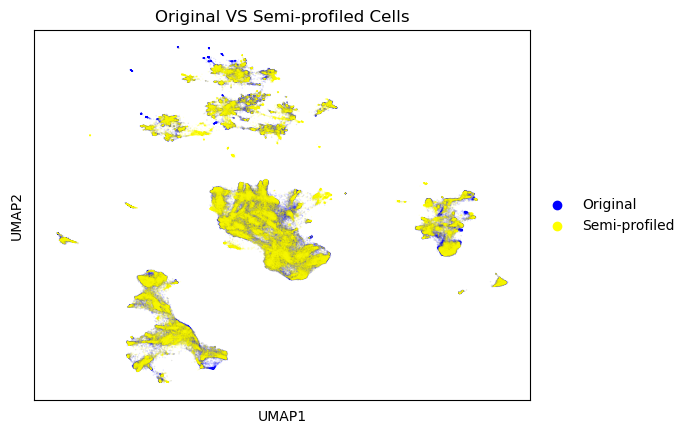

In [67]:
pointsize = 120000 / combdata.X.shape[0] * 15
#color_map = 'magma'

palette = {'Original':'blue','Semi-profiled':'yellow'}
sc.pl.umap(combdata,color = 'label',
           title = 'Original VS Semi-profiled Cells',
           size = pointsize,
           palette = palette,
           save='ori vs semi t10 50 0.1 .pdf',
           alpha=0.1)

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


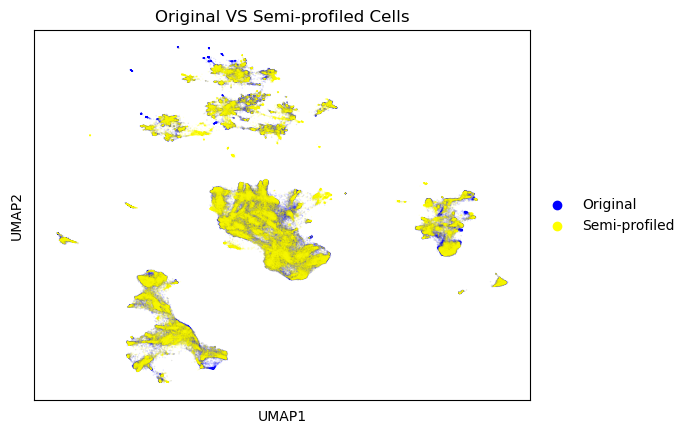

In [79]:
pointsize = 120000 / combdata.X.shape[0] * 15
#color_map = 'magma'

palette = {'Original':'blue','Semi-profiled':'yellow'}
sc.pl.umap(combdata,color = 'label',
           title = 'Original VS Semi-profiled Cells',
           size = pointsize,
           palette = palette,
           show=False,
           alpha=0.1)
fname = 'cancer ori vs semi umap dpi600'
plt.savefig(fname+'.jpg', dpi=600, bbox_inches='tight')


In [81]:
#sc.pl.umap(combdata,color = 'label',title = 'Original VS Semi-profiled Cells',save='ori vs semi (activation).jpg')

In [53]:
totaltypes = np.unique(gtdata.obs['celltypes'])

In [54]:
celltypecolor =[ ]
for i in alldata.obs['celltypes']:
    celltypecolor.append(str(list(totaltypes).index(i)))
alldata.obs['celltypecolor'] = celltypecolor

In [55]:
lengt = gtdata.X.shape[0]

In [56]:
gtdata.obsm['X_umap'] = combdata.obsm['X_umap'][:lengt]

In [57]:
semisdata.obsm['X_umap'] = combdata.obsm['X_umap'][lengt:]

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


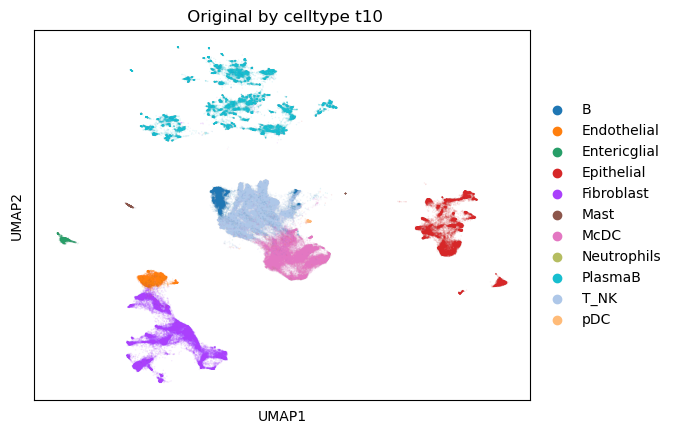

In [66]:
## only gt
gtdata.obs['ft'] = np.concatenate(celltypes,axis=0)
sc.pl.umap(gtdata, color = 'ft',
           title = ' Original by celltype t10',
           size = pointsize,
           save='Original by celltype t10.pdf',
           alpha=0.1)

In [86]:
gtdata.obsm['X_umap'] = combdata.obsm['X_umap'][:(gtdata.X.shape[0])]

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


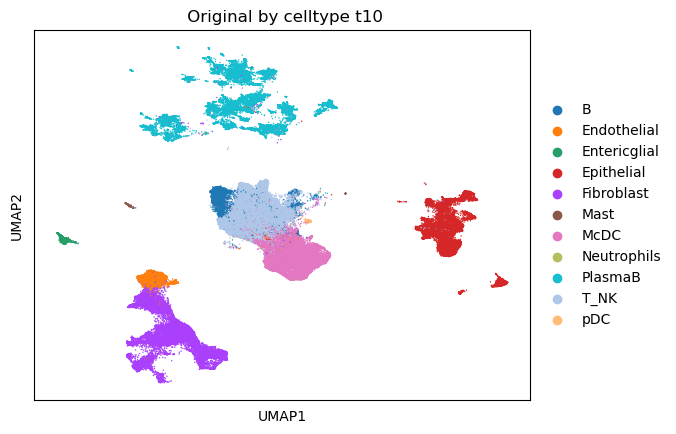

In [93]:

sc.pl.umap(gtdata, color = 'celltypes',
           title = ' Original by celltype t10',
           size = pointsize,
           show=False,
           alpha=1)
fname = 'cancer gt a1 celltype umap dpi600'
plt.savefig(fname+'.jpg', dpi=600, bbox_inches='tight')


/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


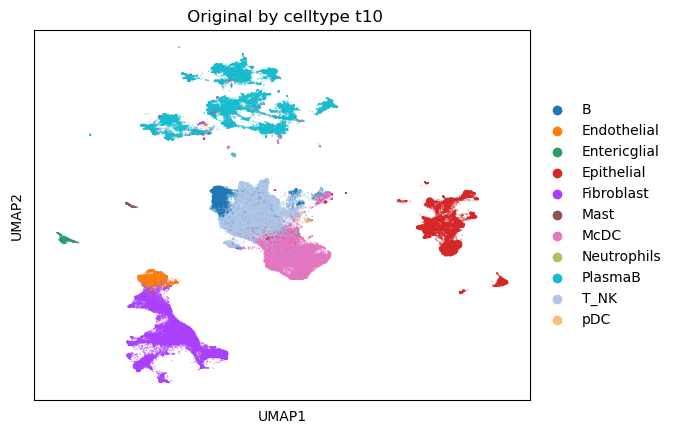

In [90]:
#semisdata.obs['celltypes'] = np.concatenate(pcelltypes,axis=0)
sc.pl.umap(semisdata, color = 'celltypes',
           title = ' Original by celltype t10',
           size = pointsize,
           #save=' semi by celltype t10.pdf',
           alpha=0.5)

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


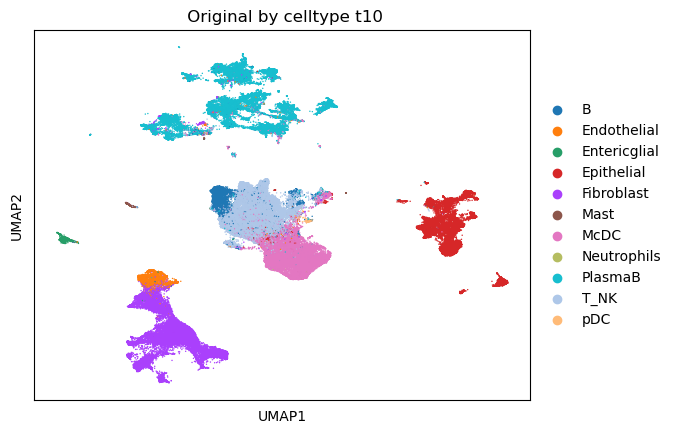

In [92]:

sc.pl.umap(semisdata, color = 'celltypes',
           title = ' Original by celltype t10',
           size = pointsize,
           show=False,
           alpha=1)
fname = 'cancer semi a1 celltype umap dpi600'
plt.savefig(fname+'.jpg', dpi=600, bbox_inches='tight')


In [26]:
semirep = []
for i in semirepmask:
    if i == 1:
        semirep.append('Representative')
    else:
        semirep.append('Semi-profiled')

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


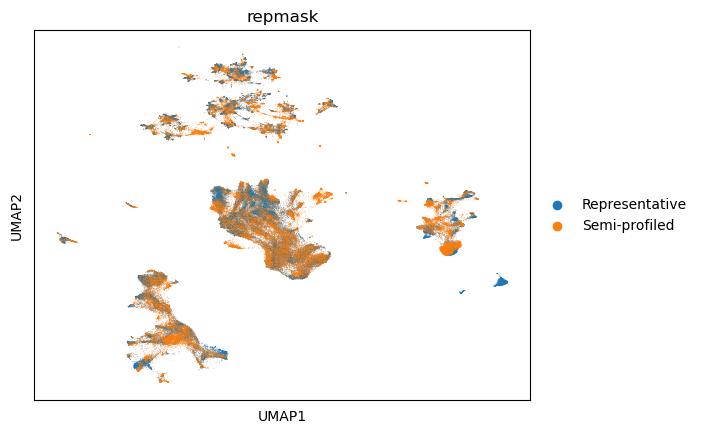

In [27]:
## only semis
semisdata.obs['repmask'] = semirep
sc.pl.umap(semisdata,color = 'repmask')

In [130]:
semisdata

AnnData object with n_obs × n_vars = 221502 × 4053
    obs: 'patient_ids', 'sample_ids', 'sample_origin', 'repmask', 'celltypes'
    var: 'gene_symbols'
    uns: 'repmask_colors', 'celltypes_colors', 'rank_genes_groups', 'neighbors', 'paga', 'celltypes_sizes'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [16]:
1+1

2

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


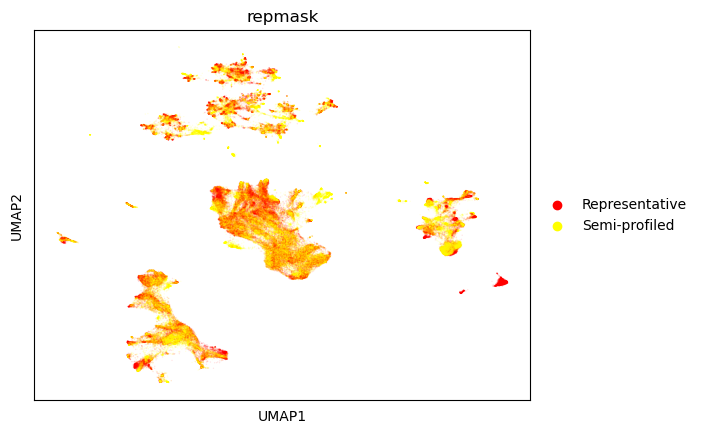

In [30]:
pointsize = 120000 / combdata.X.shape[0] * 15
palette = {'Representative':'red','Semi-profiled':'yellow'}
sc.pl.umap(semisdata, color = 'repmask',
           size = pointsize,
           palette = palette,
           save=' semi rep vs non.pdf',
           alpha=0.1)


In [31]:
semisdata.write('semisdata_repmask930.h5ad')

In [16]:
gtdata = anndata.read_h5ad('gtdata.h5ad')
semisdata = anndata.read_h5ad('semisdata_withcelltype.h5ad')

### Deconv

In [14]:
import sklearn
from sklearn.svm import LinearSVC

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

linearSVM = MLPClassifier()#MLPClassifier()#LinearSVC()
#linearSVM.fit(((x_train-20)*(x_train>20)), y_train)
xtrain=[]
ytrain=[]
for i in (representatives):
    xtrain.append(gts[i])
    ytrain.append(celltypes[i])
xtrain = np.concatenate(xtrain,axis=0)
ytrain = np.concatenate(ytrain,axis=0)
linearSVM.fit((xtrain),ytrain)

MLPClassifier()

In [15]:
def deconv(svc,xtest):
    ytest = svc.predict((xtest))
    return list(ytest)

In [17]:
# get predicted label 

pcelltypes = []
for i in range(112):
    if i in representatives:
        pcelltypes.append(celltypes[i])
        continue
    pcelltypes.append(list(deconv(linearSVM,semis[i])))

NameError: name 'linearSVM' is not defined

In [21]:
len(pcelltypes)

112

In [32]:
semisdata.obs['celltypes'] = np.concatenate(pcelltypes,axis=0)

In [105]:
'''import copy

offset = lengt
ctodel = []
for i in range(len(pids)):
    todel = []
    for j in range(semis_clean[i].shape[0]):
        if outmask2[offset]:
            todel.append(j)
            ctodel.append(offset)
        offset+=1 
    semis_clean[i] = np.delete(semis_clean[i],todel,axis=0)
    pcelltypes[i] = np.delete(list(pcelltypes[i]),todel,axis=0)'''


'import copy\n\noffset = lengt\nctodel = []\nfor i in range(len(pids)):\n    todel = []\n    for j in range(semis_clean[i].shape[0]):\n        if outmask2[offset]:\n            todel.append(j)\n            ctodel.append(offset)\n        offset+=1 \n    semis_clean[i] = np.delete(semis_clean[i],todel,axis=0)\n    pcelltypes[i] = np.delete(list(pcelltypes[i]),todel,axis=0)'

In [22]:
totaltypes = np.unique(np.concatenate(celltypes,axis=0))
#totalsubtypes =  np.unique(np.concatenate(subtypes,axis=0))
totaltypes

array(['B', 'Endothelial', 'Entericglial', 'Epithelial', 'Fibroblast',
       'Mast', 'McDC', 'Neutrophils', 'PlasmaB', 'T_NK', 'pDC'],
      dtype=object)

In [129]:
def prop(gttypes ,semitypes, totaltypes):
    pgt = np.zeros(totaltypes.shape)
    psemi = np.zeros(totaltypes.shape)
    for i in range(len(totaltypes)):
        pgt[i] += (np.array(gttypes) == totaltypes[i]).sum()
        psemi[i] += (np.array(semitypes) == totaltypes[i]).sum()  ## celltypes2
    numgt=pgt
    numsemi=psemi
    pgt = pgt/pgt.sum()
    psemi = psemi/psemi.sum()
    pcor,pval = scipy.stats.pearsonr(pgt,psemi)
    return pcor,pval,pgt,psemi,numgt,numsemi

def RMSE(p1,p2):
    p1 = np.array(p1)
    p2 = np.array(p2)
    mse = ((p1-p2)**2).sum()
    rmse = mse**0.5
    return rmse

In [140]:
len(pcelltypes)

112

In [139]:
# get pcors
pcors = []
pgts=[]
psemis=[]
numgts = []
numsemis = []
prmses = []
for i in range(112):
    if i in representatives:
        pcor, pval, pgt, psemi, numgt, numsemi = prop(celltypes[i],celltypes[i],totaltypes)
    pcor, pval, pgt, psemi, numgt, numsemi = prop(celltypes[i],pcelltypes[i],totaltypes)
    pcors.append(pcor)
    pgts.append(pgt)
    psemis.append(psemi)
    numgts.append(numgt.astype('float'))
    numsemis.append(numsemi.astype('float'))
    prmses.append(RMSE(pgt,psemi))
    


In [36]:
print(np.mean(pcors))

0.928115742972661


In [37]:
print(np.mean(prmses))

0.11831626631483601


In [99]:
import pandas as pd
df = pd.read_csv('patient_meta.csv', encoding='latin1')
#mpids = df['Patient.ID']
#stages = df['Stage']

In [113]:
len(df['iCMS.transcriptomic'])

63

In [109]:
df.columns

Index(['dataset', 'patient.ID', 'Gender', 'Age at recruitment', 'MSS/MSI',
       'Site', 'Sidedness', 'Group Stage', 'Stage TNM', 'iCMS.transcriptomic',
       'iCMS.inferCNV', 'KRAS', 'BRAF', 'TP53', 'APC', 'PIK3CA', 'LymphNode',
       'Normal', 'Tumor', 'CMS'],
      dtype='object')

In [116]:
gtdata.obs['sample_origin']

0          Tumor
1          Tumor
2          Tumor
3          Tumor
4          Tumor
           ...  
214353    Normal
214354    Normal
214355    Normal
214356    Normal
214357    Normal
Name: sample_origin, Length: 214358, dtype: category
Categories (4, object): ['LymphNode', 'Normal', 'Tumor', 'Tumor-2']

In [114]:
df

,dataset,patient.ID,Gender,Age at recruitment,MSS/MSI,Site,Sidedness,Group Stage,Stage TNM,iCMS.transcriptomic,iCMS.inferCNV,KRAS,BRAF,TP53,APC,PIK3CA,LymphNode,Normal,Tumor,CMS
0,CRC-SG2,CRC-JSC-S02,M,47.0,MSI-H,Caecum,R,3,pT1N1(1/65 - ileocolic node)M0,iCMS3,iCMS3,wt,wt,wt,mut,wt,0,0,3,CMS3
1,CRC-SG2,CRC-JSC-S03,F,59.0,MSI-H,Ascending colon,R,2,T3N0M0,iCMS3,iCMS3,wt,wt,wt,wt,mut,0,0,4,CMS3
2,CRC-SG2,CRC-JSC-S04,F,65.0,MSS,Distal Sigmoid colon,L,3,T4bN2aM0,iCMS2,iCMS2,wt,wt,mut,mut,wt,0,0,2,NaN
3,CRC-SG2,CRC-JSC-S05,M,79.0,MSI-H,Caecum,R,2,mpT3N0M0,iCMS3,iCMS3,mut,mut,mut,wt,mut,0,0,2,CMS3
4,CRC-SG2,CRC-JSC-S06,M,80.0,MSS,Rectum,L,3,T4aN1M0,iCMS2,iCMS2,mut,wt,mut,mut,wt,0,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,SMC,SMC21,M,51.0,MSS,Rectum,L,IVA,T3N1M1a,iCMS2,iCMS2,wt,wt,mut,mut,NaN,0,0,1,CMS2
59,SMC,SMC22,M,76.0,MSS,Sigmoid colon,L,IIIB,T3N1bM0,iCMS2,iCMS3,wt,mut,mut,mut,NaN,0,0,1,CMS2
60,SMC,SMC23,F,67.0,MSS,Ascending colon,R,IIIB,T3N1bM0,iCMS2,iCMS2,mut,wt,mut,mut,NaN,0,0,1,CMS2
61,SMC,SMC24,F,48.0,MSI-H,Ascending colon,R,I,T1N0M0,iCMS3,iCMS3,mut,wt,wt,mut,NaN,0,0,1,CMS4


In [119]:
mpids = np.array(df['patient.ID'])

In [121]:
subtypes = np.array(df['iCMS.transcriptomic'])

In [122]:
ptdic = {}
for i in range(len(mpids)):
    pid = mpids[i]
    ptdic[pid] = subtypes[i]

#psdic={}
spdic={}
for i in range(gtdata.X.shape[0]):
    pid = gtdata.obs['patient_ids'][i]
    sid = gtdata.obs['sample_ids'][i]
    if sid not in spdic.keys():
        spdic[sid] = pid

stdic = {}
for sid in spdic.keys():
    pid = spdic[sid]
    subtype = ptdic[pid]
    stdic[sid]=subtype

In [125]:
gtsubtypes = []

for i in range(gtdata.X.shape[0]):
    subtype = stdic[gtdata.obs['sample_ids'][i]]
    gtsubtypes.append(subtype)

gtdata.obs['subtype'] = gtsubtypes


semisubtypes = []


for i in range(semisdata.X.shape[0]):
    subtype = stdic[semisdata.obs['sample_ids'][i]]
    semisubtypes.append(subtype)

semisdata.obs['subtype'] = semisubtypes


In [127]:
gtdata.write('gtdata_subtype.h5ad')
semisdata.write('semisdata_subtype.h5ad')

In [25]:
total_tissues = np.unique(semisdata.obs['sample_origin'])
total_tissues

array(['LymphNode', 'Normal', 'Tumor', 'Tumor-2'], dtype=object)

In [83]:
'''
SAVE DECONV RESULTS
'''

f = open('deconv/semipcor.txt','w')
for i in range(len(pcors)):
    f.write(str(pcors[i]) + '\n')
f.close()

f = open('deconv/prmses.txt','w')
for i in range(len(prmses)):
    f.write(str(prmses[i]) + '\n')
f.close()


In [145]:
len(pids)

112

In [146]:
subtype_sample = []
for i in range(len(pids)):
    subtype_sample.append(stdic[pids[i]])

        

In [147]:
len(subtype_sample)

112

In [150]:
LymphNode = np.zeros(totaltypes.shape)
Normal = np.zeros(totaltypes.shape)
Tumor = np.zeros(totaltypes.shape)
Tumor2 = np.zeros(totaltypes.shape)
Tumors = np.zeros(totaltypes.shape)
icms2 = np.zeros(totaltypes.shape)
icms3 = np.zeros(totaltypes.shape)


LymphNodesemi = np.zeros(totaltypes.shape)
Normalsemi = np.zeros(totaltypes.shape)
Tumorsemi = np.zeros(totaltypes.shape)
Tumor2semi = np.zeros(totaltypes.shape)
Tumorssemi = np.zeros(totaltypes.shape)
icms2semi = np.zeros(totaltypes.shape)
icms3semi = np.zeros(totaltypes.shape)


for i in range(112):
    if sample_origin[i][0] == 'LymphNode':
        LymphNode += numgts[i]
        LymphNodesemi += numsemis[i]
    if sample_origin[i][0] == 'Normal':
        Normal += numgts[i]
        Normalsemi += numsemis[i]
    if sample_origin[i][0] == 'Tumor':
        Tumor += numgts[i]
        Tumorsemi += numsemis[i]
        
        Tumors += numgts[i]
        Tumorssemi += numsemis[i]
        
        if subtype_sample[i] == 'iCMS3':
            icms3 += numgts[i]
            icms3semi += numsemis[i]
        if subtype_sample[i] == 'iCMS2':
            icms2 += numgts[i]
            icms2semi += numsemis[i]
        
        
    if sample_origin[i][0] == 'Tumor-2':
        Tumor2 += numgts[i]
        Tumor2semi += numsemis[i]
    
        Tumors += numgts[i]
        Tumorssemi += numsemis[i]
        
        
        if subtype_sample[i] == 'iCMS3':
            icms3 += numgts[i]
            icms3semi += numsemis[i]
        if subtype_sample[i] == 'iCMS2':
            icms2 += numgts[i]
            icms2semi += numsemis[i]
        

In [151]:
LymphNodesemi = LymphNodesemi/LymphNodesemi.sum()
Normalsemi = Normalsemi/Normalsemi.sum()
Tumorsemi = Tumorsemi/Tumorsemi.sum()
Tumor2semi = Tumor2semi/Tumor2semi.sum()

Tumorssemi = Tumorssemi/Tumorssemi.sum()

icms2semi = icms2semi/icms2semi.sum()
icms3semi = icms3semi/icms3semi.sum()

LymphNode = LymphNode/LymphNode.sum()
Normal = Normal/Normal.sum()
Tumor = Tumor/Tumor.sum()
Tumor2 = Tumor2/Tumor2.sum()

Tumors = Tumors/Tumors.sum()

icms2 = icms2/icms2.sum()
icms3 = icms3/icms3.sum()



In [28]:
import scipy
print(scipy.stats.pearsonr(LymphNodesemi,LymphNode))
print(scipy.stats.pearsonr(Normalsemi,Normal))
print(scipy.stats.pearsonr(Tumorsemi,Tumor))
print(scipy.stats.pearsonr(Tumor2semi,Tumor2))

PearsonRResult(statistic=0.9963526200285248, pvalue=6.223854883678342e-11)
PearsonRResult(statistic=0.9926545163215026, pvalue=1.445214721671041e-09)
PearsonRResult(statistic=0.9929458202200531, pvalue=1.2051235492149173e-09)
PearsonRResult(statistic=0.9932399643749465, pvalue=9.95350476852787e-10)


In [152]:
import scipy
print(scipy.stats.pearsonr(LymphNodesemi,LymphNode))
print(scipy.stats.pearsonr(Normalsemi,Normal))
print(scipy.stats.pearsonr(Tumorsemi,Tumor))
print(scipy.stats.pearsonr(Tumor2semi,Tumor2))
print(scipy.stats.pearsonr(Tumorssemi,Tumors))

print(scipy.stats.pearsonr(icms2semi,icms2))
print(scipy.stats.pearsonr(icms3semi,icms3))


PearsonRResult(statistic=0.9954252470139681, pvalue=1.722748110484707e-10)
PearsonRResult(statistic=0.9934223998002683, pvalue=8.802842920694951e-10)
PearsonRResult(statistic=0.9938490422782615, pvalue=6.513697662238581e-10)
PearsonRResult(statistic=0.9931356779437963, pvalue=1.066178730822085e-09)
PearsonRResult(statistic=0.9969712447057335, pvalue=2.6990996366887138e-11)
PearsonRResult(statistic=0.9940088506222255, pvalue=5.787360341437546e-10)
PearsonRResult(statistic=0.9879762205072865, pvalue=1.3185767579615783e-08)


In [41]:
colormap = ['yellow','blue','gray','red','green','black','darkgreen','darkorange','crimson',\
            'purple','navy','aquamarine','plum','violet','olive','steelblue','brown','pink']

In [87]:
import matplotlib.patches as mpatches
def stackedbar(percentages = [LymphNodesemi,Normalsemi,Tumorsemi,Tumor2semi],\
               totaltypes=totaltypes,\
               colormap=colormap,\
               save = True,\
               title = 'Ground Truth'\
               ):
    
    
    
    ylabels = ['LymphNode','Normal','Tumor','Tumor-2']
    
    # Create a horizontal stacked bar chart for Condition 1
    fig, [ax0, ax1, ax2, ax3] = plt.subplots(4,1,figsize = (8,2))
    ax = [ax0, ax1, ax2, ax3]
    ax0.set_title(title)
    
    
    for j in range(4):
        for i in range(len(totaltypes)):
            ax[j].barh(ylabels[j], percentages[j][i], left=sum(percentages[j][:i]),color=colormap[i])
            ax[j].set_ylabel(ylabels[j],rotation=0,ha='right',y=-0.05)
            ax[j].set_xlim([0, 1])
            ax[j].set_yticklabels([])
            ax[j].yaxis.set_tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
            if j != 7:
                ax[j].set_xticklabels([])
    
    
    patches = []
    for i in range(len(totaltypes)):
        patches.append(mpatches.Patch(color=colormap[i], label=totaltypes[i]))
    ax[-1].legend(handles=patches, loc='center left', bbox_to_anchor=(1.1, 5))

    '''
    patches1 = []
    for i in range(len(totaltypes)//2):
        patches1.append(mpatches.Patch(color=colormap[i], label=totaltypes[i]))
    ax[-2].legend(handles=patches1, loc='center left', bbox_to_anchor=(1.07, 3.8))
    
    patches2 = []
    for i in range(9,18):
        patches2.append(mpatches.Patch(color=colormap[i], label=totaltypes[i]))
    ax[-1].legend(handles=patches2, loc='center left', bbox_to_anchor=(1.3, 5))
    '''
    
    plt.xlabel('Proportion')
    
    if save != False:
        if save == True:
            path = 'stackedbar.png'
        else:
            path = save
        plt.savefig(path,dpi=600,bbox_inches='tight')
    # Create a legend for the chart
    #legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors_1]
    #plt.legend(legend_handles, categories_1, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the chart
    #plt.show()


In [160]:
icms3semi

array([0.02461343, 0.02907958, 0.00156811, 0.21318406, 0.13029238,
       0.00740388, 0.2051847 , 0.00027789, 0.14519939, 0.24117192,
       0.00202465])

In [157]:
colormap = gtdata.uns['celltypes_colors']

In [161]:
import matplotlib.patches as mpatches
def stackedbar(percentages = [LymphNodesemi,Normalsemi,icms2semi,icms3semi],\
               totaltypes=totaltypes,\
               colormap=colormap,\
               save = True,\
               title = 'Ground Truth'\
               ):
    
    
    
    ylabels = ['LymphNode','Normal','iCMS2','iCMS3']
    
    # Create a horizontal stacked bar chart for Condition 1
    fig, [ax0, ax1, ax2, ax3] = plt.subplots(4,1,figsize = (8,2))
    ax = [ax0, ax1, ax2, ax3]
    ax0.set_title(title)
    
    
    for j in range(4):
        for i in range(len(totaltypes)):
            ax[j].barh(ylabels[j], percentages[j][i], left=sum(percentages[j][:i]),color=colormap[i])
            ax[j].set_ylabel(ylabels[j],rotation=0,ha='right',y=-0.05)
            ax[j].set_xlim([0, 1])
            ax[j].set_yticklabels([])
            ax[j].yaxis.set_tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
            if j != 7:
                ax[j].set_xticklabels([])
    
    
    patches = []
    for i in range(len(totaltypes)):
        patches.append(mpatches.Patch(color=colormap[i], label=totaltypes[i]))
    ax[-1].legend(handles=patches, loc='center left', bbox_to_anchor=(1.1, 5))

    '''
    patches1 = []
    for i in range(len(totaltypes)//2):
        patches1.append(mpatches.Patch(color=colormap[i], label=totaltypes[i]))
    ax[-2].legend(handles=patches1, loc='center left', bbox_to_anchor=(1.07, 3.8))
    
    patches2 = []
    for i in range(9,18):
        patches2.append(mpatches.Patch(color=colormap[i], label=totaltypes[i]))
    ax[-1].legend(handles=patches2, loc='center left', bbox_to_anchor=(1.3, 5))
    '''
    
    plt.xlabel('Proportion')
    
    if save != False:
        if save == True:
            path = 'subtypestackedbar.png'
        else:
            path = save
        plt.savefig(path,dpi=600,bbox_inches='tight')

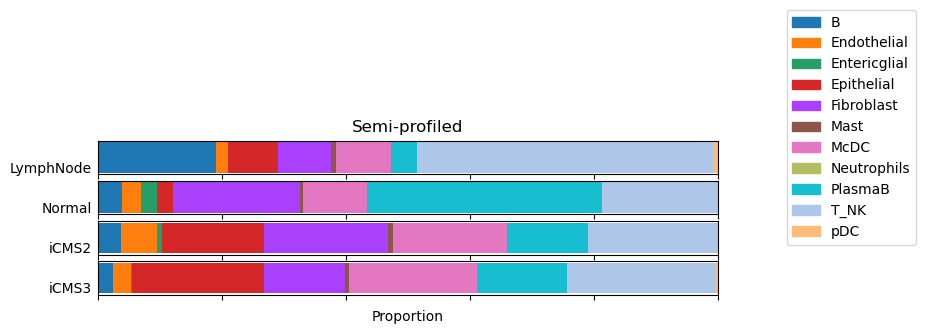

In [162]:
stackedbar(\
          save = 'subtype_semi_stackedbar.pdf',title = 'Semi-profiled')

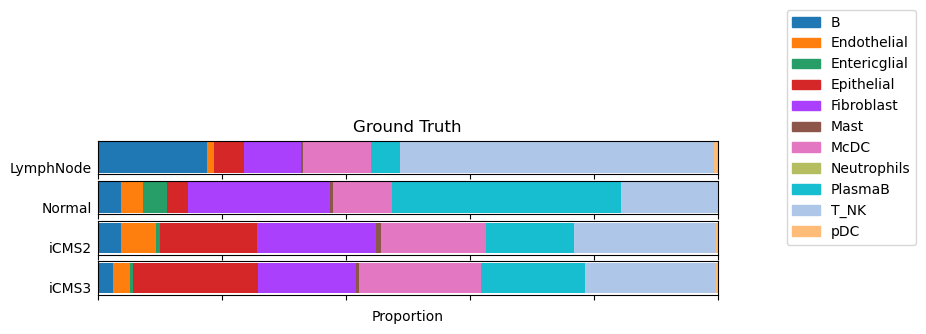

In [163]:
stackedbar(percentages = [LymphNode,Normal,icms2,icms3] ,save = 'subtype_gt_stackedbar.pdf')

In [88]:
len(pids)

112

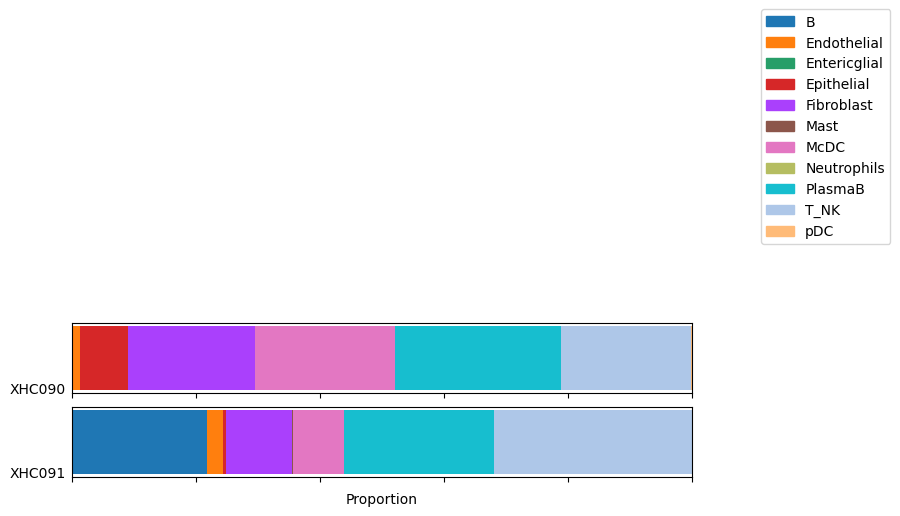

In [94]:

    #for i in range(11):
    nps = i*10
    
    ppids = pids[nps:nps+10]
    ppsemis = psemis[nps:nps+10]
    ppgts = pgts[nps:nps+10]
    ylabels = pids[nps:nps+10]
    
    
    ppids = pids[110:]
    ppsemis = psemis[110:]
    ppgts = pgts[110:]
    ylabels = pids[110:]
    
    
    # Create a horizontal stacked bar chart for Condition 1
    title =  ''
    

    
    
    fig, ax = plt.subplots(len(ppids),1,figsize = (8,2))
    ax[0].set_title(title)
    
    
    for j in range(len(ppids)):
        for i in range(len(totaltypes)):
            ax[j].barh(ylabels[j], ppsemis[j][i], left=sum(ppsemis[j][:i]),color=colormap[i])
            ax[j].set_ylabel(ylabels[j],rotation=0,ha='right',y=-0.05)
            ax[j].set_xlim([0, 1])
            ax[j].set_yticklabels([])
            ax[j].yaxis.set_tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
            #if j != 7:
            ax[j].set_xticklabels([])
    
    
    patches = []
    for i in range(len(totaltypes)):
        patches.append(mpatches.Patch(color=colormap[i], label=totaltypes[i]))
    ax[-1].legend(handles=patches, loc='center left', bbox_to_anchor=(1.1, 5))

    '''
    patches1 = []
    for i in range(len(totaltypes)//2):
        patches1.append(mpatches.Patch(color=colormap[i], label=totaltypes[i]))
    ax[-2].legend(handles=patches1, loc='center left', bbox_to_anchor=(1.07, 3.8))
    
    patches2 = []
    for i in range(9,18):
        patches2.append(mpatches.Patch(color=colormap[i], label=totaltypes[i]))
    ax[-1].legend(handles=patches2, loc='center left', bbox_to_anchor=(1.3, 5))
    '''
    
    plt.xlabel('Proportion')


    plt.savefig('supdecov/semi_' + str(111) + 'to' + str(112) + '.pdf',bbox_inches='tight')

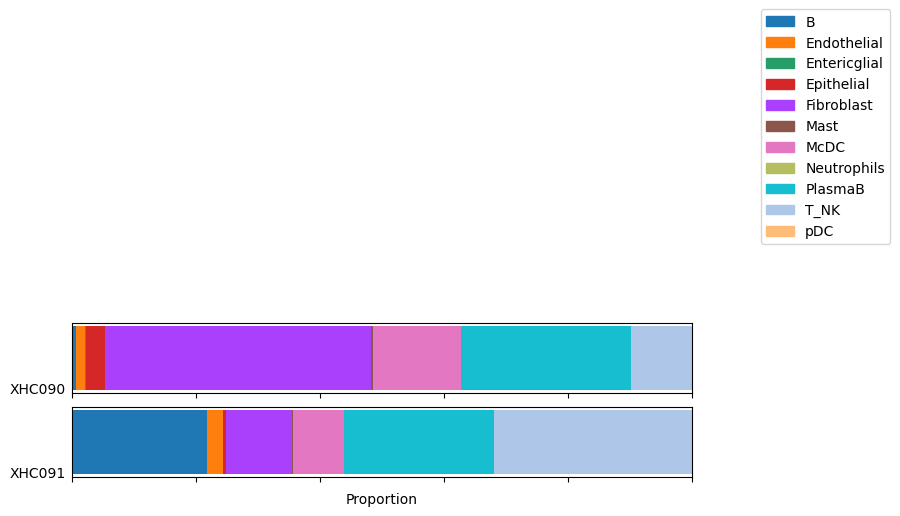

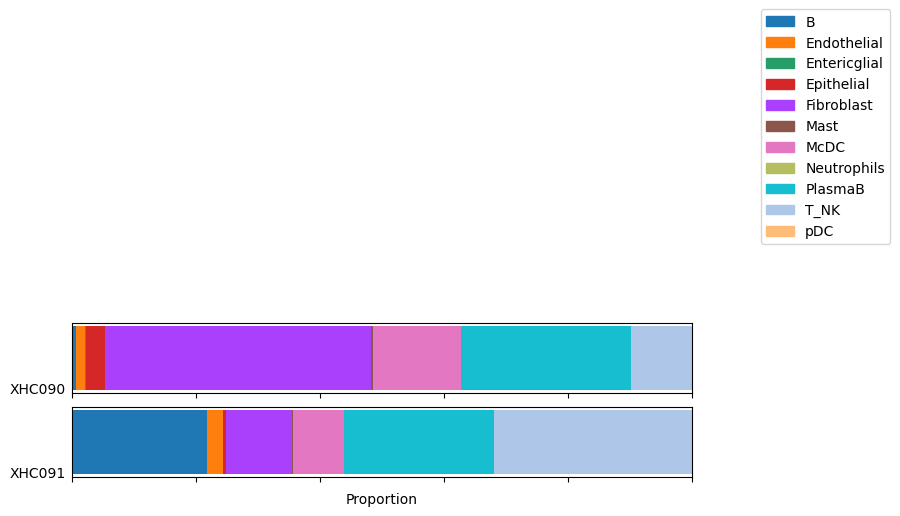

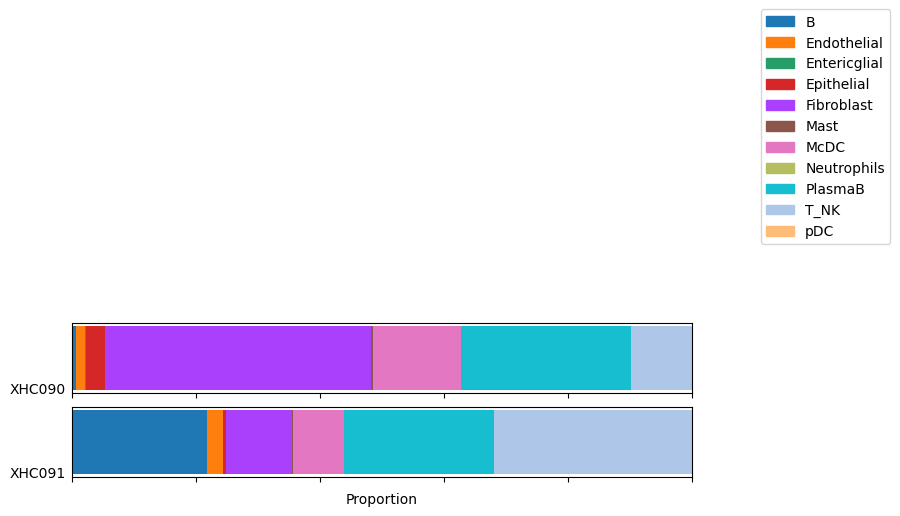

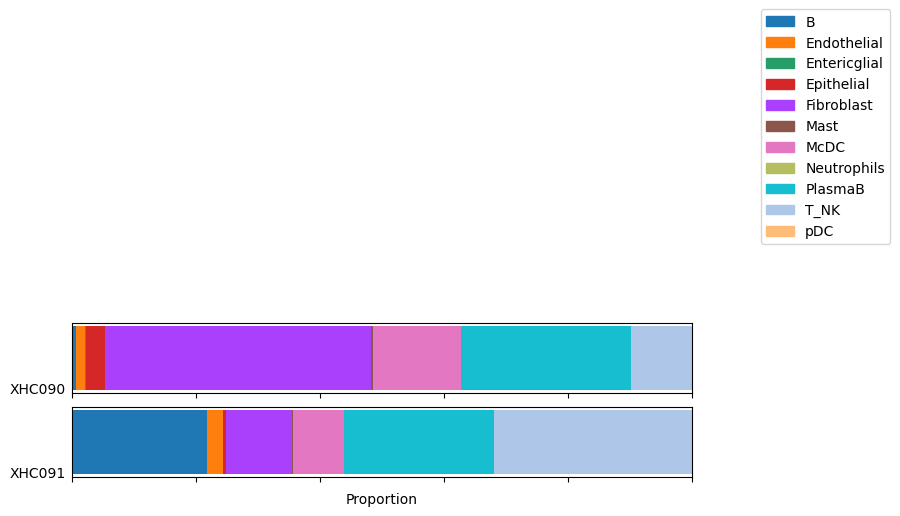

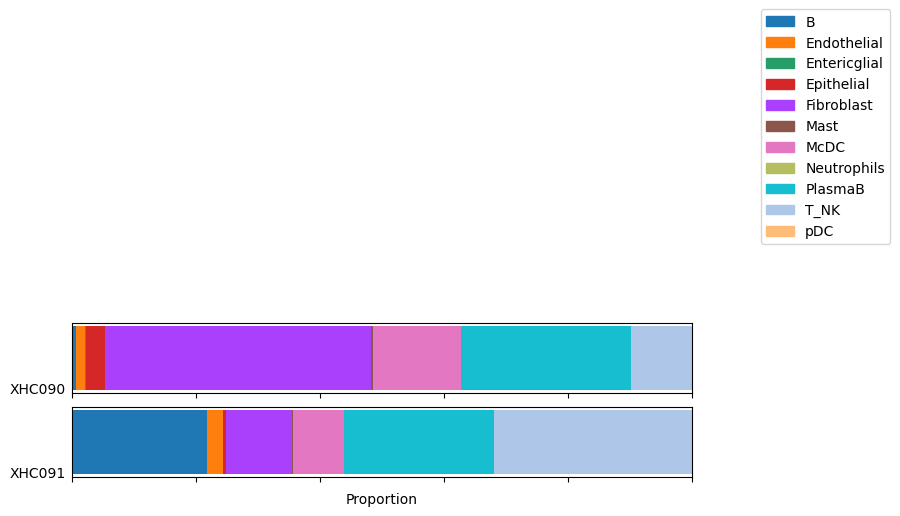

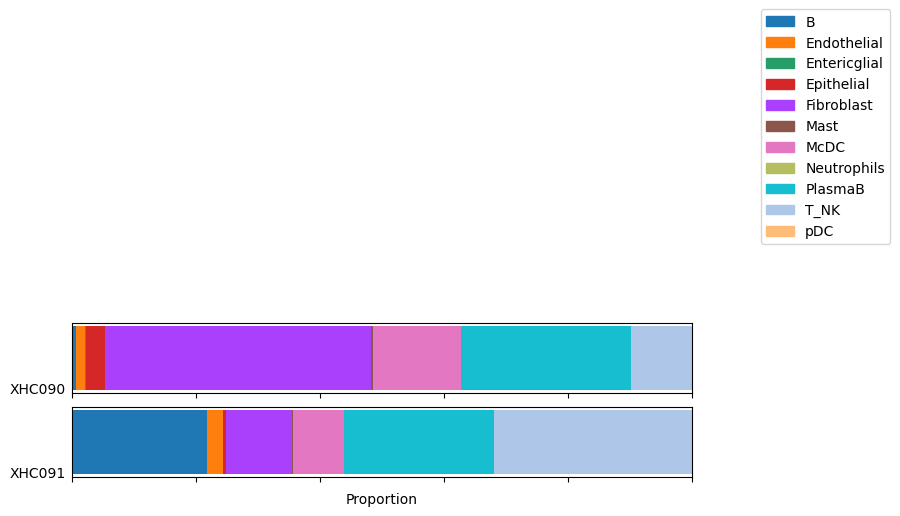

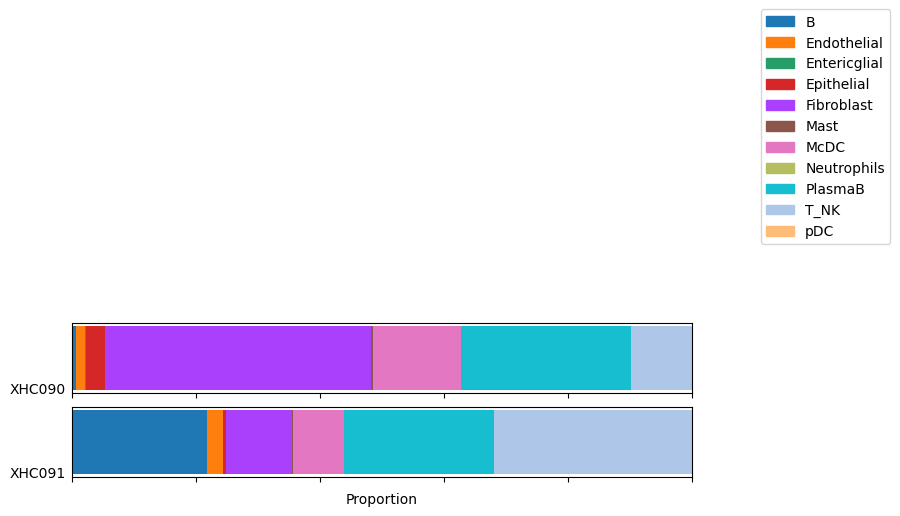

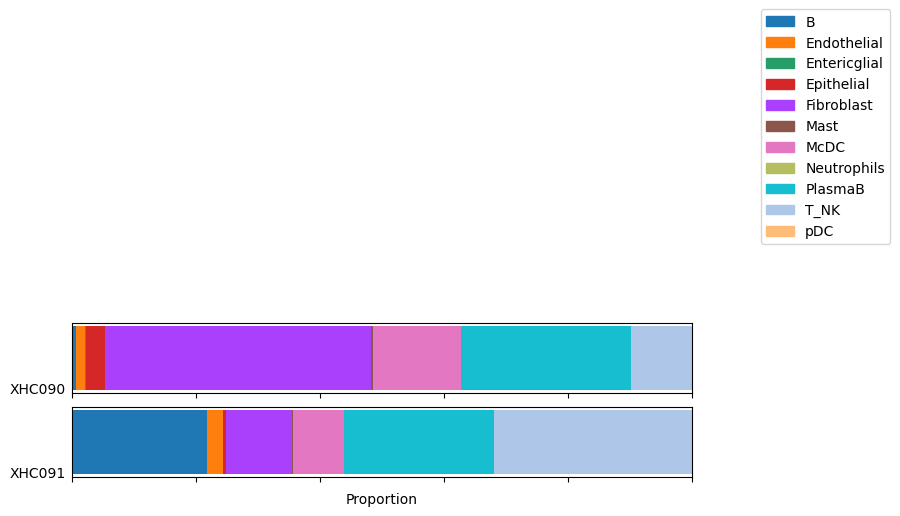

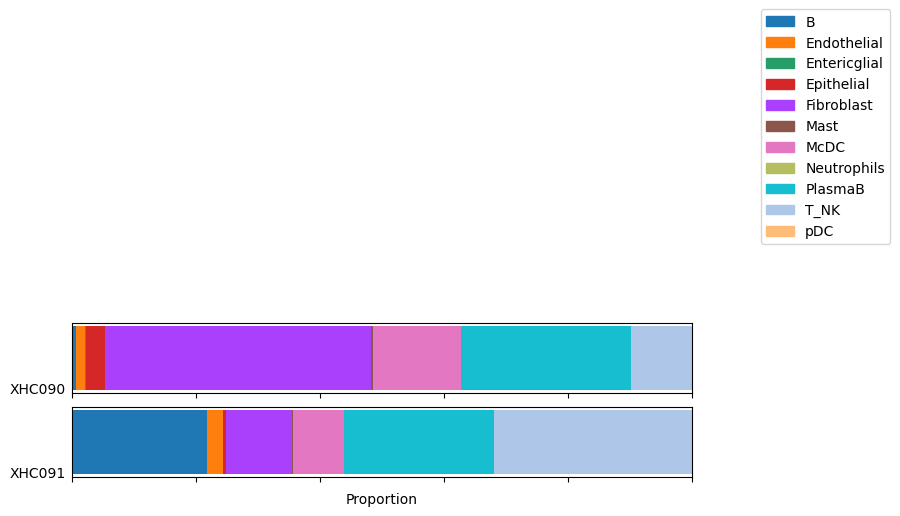

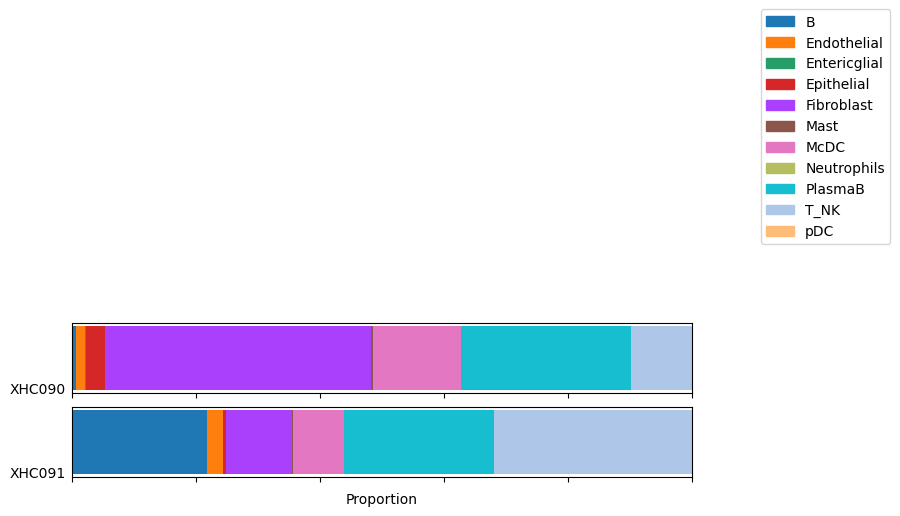

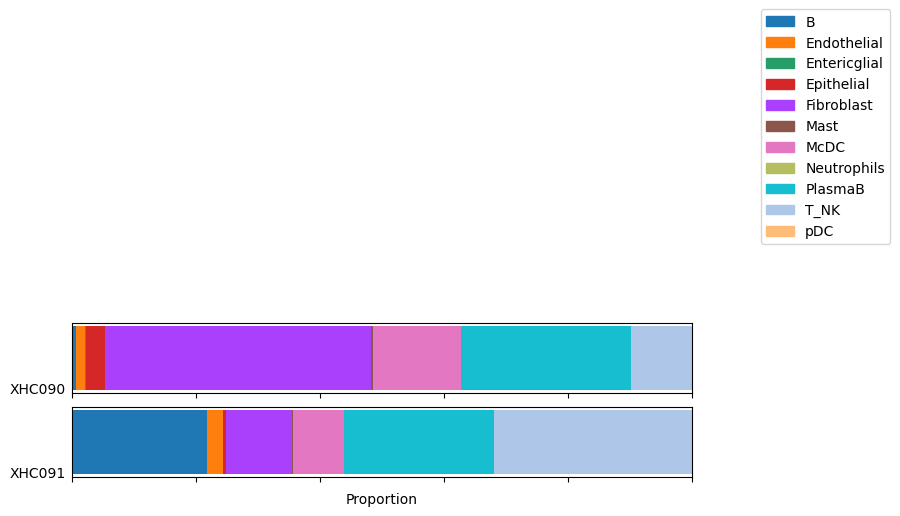

In [95]:
for i in range(11):
    nps = i*10
    
    ppids = pids[nps:nps+10]
    ppsemis = psemis[nps:nps+10]
    ppgts = pgts[nps:nps+10]
    ylabels = pids[nps:nps+10]
    
    
    
    # Create a horizontal stacked bar chart for Condition 1
    title =  ''
    

    
    
    fig, ax = plt.subplots(len(ppids),1,figsize = (8,2))
    ax[0].set_title(title)
    
    
    for j in range(len(ppids)):
        for i in range(len(totaltypes)):
            ax[j].barh(ylabels[j], ppgts[j][i], left=sum(ppgts[j][:i]),color=colormap[i])
            ax[j].set_ylabel(ylabels[j],rotation=0,ha='right',y=-0.05)
            ax[j].set_xlim([0, 1])
            ax[j].set_yticklabels([])
            ax[j].yaxis.set_tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
            #if j != 7:
            ax[j].set_xticklabels([])
    
    
    patches = []
    for i in range(len(totaltypes)):
        patches.append(mpatches.Patch(color=colormap[i], label=totaltypes[i]))
    ax[-1].legend(handles=patches, loc='center left', bbox_to_anchor=(1.1, 5))

    '''
    patches1 = []
    for i in range(len(totaltypes)//2):
        patches1.append(mpatches.Patch(color=colormap[i], label=totaltypes[i]))
    ax[-2].legend(handles=patches1, loc='center left', bbox_to_anchor=(1.07, 3.8))
    
    patches2 = []
    for i in range(9,18):
        patches2.append(mpatches.Patch(color=colormap[i], label=totaltypes[i]))
    ax[-1].legend(handles=patches2, loc='center left', bbox_to_anchor=(1.3, 5))
    '''
    
    plt.xlabel('Proportion')


    plt.savefig('supdecov/gt_' + str(nps) + 'to' + str(nps+10)+ '.pdf',bbox_inches='tight')

### deconv benchmarking

In [119]:
bulkdata = anndata.read_h5ad('bulkcount.h5ad')
bulkdata

AnnData object with n_obs × n_vars = 112 × 33287
    obs: 'sampleid'
    var: 'gene_symbols', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'

In [120]:
### get full bulk

genelist = list(bulkdata.var['gene_symbols'])

f=open('fullbulk.txt','w')
f.write('Gene')
for i in range(len(pids)):
    f.write('\t'+str(pids[i]))
f.write('\n')
for i in range(len(genelist)):
    f.write(genelist[i])
    for j in range(len(pids)):
        f.write('\t'+str(bulkdata.X[j,i]))
    f.write('\n')

f.close()

In [128]:
hvbulkdata = bulkdata[:,hvmask]

In [125]:
hvgenes = np.array(alldata.var.index)

In [133]:
### get highly varialbe bulk

#hvbulkdata = copy.deepcopy(bulkdata[:,hvmask])
#hvgenes = np.array(genelist)[hvmask]

f=open('hvbulk.txt','w')
f.write('Gene')
for i in range(len(pids)):
    f.write('\t'+str(pids[i]))
f.write('\n')
for i in range(len(hvgenes)):
    f.write(hvgenes[i])
    for j in range(len(pids)):
        f.write('\t'+str(hvbulkdata.X[j,i]))
    f.write('\n')

f.close()

In [69]:
hvbulkdata.X.max()

NameError: name 'hvbulkdata' is not defined

In [135]:
## get single-cell reference
init_representatives = representatives
# get expression matrix
repxs = []
for i in init_representatives:
    repx = ((alldata[alldata.obs['sample_ids'] == pids[i]].X))
    repx = np.exp(repx)-1
    repxs.append(repx)
repxs = np.concatenate(repxs,axis=0)
repxs = np.array(repxs)

KeyboardInterrupt: 

In [58]:
# for bisque
# pid of each cell
pidlist = []
for i in init_representatives:
    repdata = alldata[alldata.obs['sample_ids'] == pids[i]]
    pidlist = pidlist + list(repdata.obs['sample_ids'])
    

In [59]:
f=open('ref_pids.txt','w')
for i in pidlist:
    f.write(i+'\n')
f.close()

In [60]:
# get labels
reflabels = []
for i in init_representatives:
    repdata = alldata[alldata.obs['sample_ids'] == pids[i]]
    rlbs = repdata.obs['celltypes']
    reflabels.append(list(rlbs))
reflabels = np.concatenate(reflabels,axis=0)

# get genes
genelist = list(alldata.var.index)

In [123]:
f=open('hvref.txt','w')

f.write('GeneSymbol')
for i in range(len(reflabels)):
    f.write('\t'+str(reflabels[i]))
f.write('\n')
for i in range(len(genelist)):
    f.write(genelist[i])
    for j in range(len(reflabels)):
        f.write('\t'+str(repxs[j,i]))
    f.write('\n')

f.close()


NameError: name 'repxs' is not defined

In [122]:
## our method

# get each patient semi
ppcors = []
for i in range(len(pids)):
    px = semis[i]
    ptypes = deconv(linearSVM,px)
    gttypes = (alldata[alldata.obs['sample_ids']==pids[i]].obs['celltypes'])
    ppcor, ppval,ppgt,ppsemi,pnumgt,pnumsemi = prop(gttypes,ptypes,totaltypes)
    ppcors.append(ppcor)
    

In [63]:
ppcors

[0.9799061060343512,
 0.9742955697097491,
 0.999990679054128,
 0.9915178634997768,
 0.9673712261749278,
 0.6493143004354098,
 0.649805088547186,
 0.9932509033388255,
 1.0,
 1.0,
 0.9992416221731532,
 1.0,
 0.8721512979396008,
 0.44641659201753636,
 0.9119588143090879,
 0.9999956863898467,
 0.28581571981211823,
 0.8551609618958579,
 0.948484918349444,
 0.7580206311503934,
 0.808045116049739,
 0.978983734340713,
 1.0,
 1.0,
 0.9968921444444333,
 0.9823997034574303,
 0.9999999999999999,
 0.9413028310493923,
 1.0,
 0.9813497869848916,
 1.0,
 0.8145490083717184,
 0.989092049878258,
 0.9652617801258254,
 0.879655292364271,
 0.8366549009228654,
 0.8289079332183185,
 0.9999978252000609,
 1.0,
 0.9261889025019404,
 0.9347293159386605,
 0.9259756001508042,
 0.9999996803445185,
 1.0,
 0.9908161356348525,
 1.0,
 0.931513389095751,
 0.9999999999999999,
 0.9895626953950231,
 0.9890305761899014,
 0.9570643092187765,
 1.0,
 0.7537367671730201,
 0.9297377595595366,
 0.8900319411330208,
 0.8453015756274

In [64]:
np.mean(ppcors)

0.9204772561855048

In [164]:

origintype=[]
for i in range(gtdata.X.shape[0]):
    sampleori = gtdata.obs['sample_origin'][i]
    if (sampleori == 'Tumor') or (sampleori == 'Tumor-2'):
        subtype = gtdata.obs['subtype'][i]
        origintype.append(subtype)
    else:
        origintype.append(sampleori)
gtdata.obs['origintype'] = origintype

In [165]:
origintype=[]
for i in range(semisdata.X.shape[0]):
    sampleori = semisdata.obs['sample_origin'][i]
    if (sampleori == 'Tumor') or (sampleori == 'Tumor-2'):
        subtype = semisdata.obs['subtype'][i]
        origintype.append(subtype)
    else:
        origintype.append(sampleori)
semisdata.obs['origintype'] = origintype

In [166]:


gtdata.write('gtdata_subtype.h5ad')
semisdata.write('semisdata_subtype.h5ad')





### end of deconv benchmarking

In [167]:
f = open('immune_response.txt','r')
lines = f.readlines()
neurondiffgenes = []
for l in lines:
    neurondiffgenes.append(l.strip())


In [168]:
sc.tl.score_genes(gtdata, neurondiffgenes, ctrl_size=50, gene_pool=None, n_bins=25, score_name='neuron_differentiation_score', random_state=0, copy=False, use_raw=None)

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [169]:
sc.tl.score_genes(semisdata, neurondiffgenes, ctrl_size=50, gene_pool=None, n_bins=25, score_name='neuron_differentiation_score', random_state=0, copy=False, use_raw=None)

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [170]:
totalorigins = np.unique(gtdata.obs['origintype'])

In [171]:
totalorigins

array(['LymphNode', 'Normal', 'iCMS2', 'iCMS3'], dtype=object)

In [173]:
usedtissues = totalorigins[2:]
totaltypes = np.unique(gtdata.obs['celltypes'])

In [174]:
usedtissues

array(['iCMS2', 'iCMS3'], dtype=object)

In [185]:
heatscoregt = np.zeros((len(usedtissues),len(totaltypes)))
setscores = gtdata.obs['neuron_differentiation_score']

normalscore = np.zeros(len(totaltypes))
normalmask = gtdata.obs['origintype'] == 'Normal'
for j in range(len(totaltypes)):
    typemask = np.array(gtdata.obs['celltypes']) == totaltypes[j]
    setscore = setscores[np.logical_and(normalmask,typemask)]
    normalscore[j] = setscore.mean()

for i in range(len(usedtissues)):
    treatmask = gtdata.obs['origintype'] == usedtissues[i]
    for j in range(len(totaltypes)):
        typemask = gtdata.obs['celltypes'] == totaltypes[j]
        mask = np.logical_and(treatmask,typemask)
        setscore = setscores[mask]
        print(usedtissues[i],totaltypes[j],mask.sum())
        #if np.isnan(setscore.mean()) and mask.sum()>100:
        #    print(setscore)
        #else:
        #    print(mask.sum())
        if mask.sum()>500:
            heatscoregt[i,j] = setscore.mean() - normalscore[j]
        else:
            heatscoregt[i,j] = np.nan

iCMS2 B 3493
iCMS2 Endothelial 5196
iCMS2 Entericglial 655
iCMS2 Epithelial 14542
iCMS2 Fibroblast 17834
iCMS2 Mast 788
iCMS2 McDC 15776
iCMS2 Neutrophils 28
iCMS2 PlasmaB 13208
iCMS2 T_NK 21241
iCMS2 pDC 236
iCMS3 B 1322
iCMS3 Endothelial 1512
iCMS3 Entericglial 305
iCMS3 Epithelial 11109
iCMS3 Fibroblast 8670
iCMS3 Mast 320
iCMS3 McDC 10810
iCMS3 Neutrophils 17
iCMS3 PlasmaB 9229
iCMS3 T_NK 11680
iCMS3 pDC 116


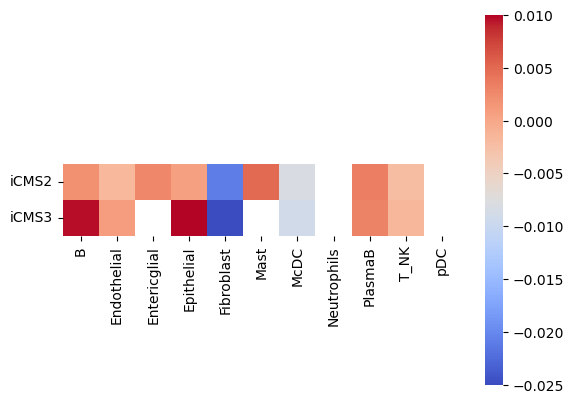

In [190]:
import seaborn as sn
sn.heatmap(heatscoregt,xticklabels = totaltypes,yticklabels=usedtissues,cmap="coolwarm",square = True,vmax=0.01,vmin=-0.025)
plt.savefig('results/cancer_immune_response_subtype_gt.pdf')

B 3835
Endothelial 5928
Entericglial 851
Epithelial 16672
Fibroblast 20189
Mast 853
McDC 18724
Neutrophils 7
PlasmaB 13292
T_NK 21042
pDC 158
B 1240
Endothelial 1465
Entericglial 79
Epithelial 10740
Fibroblast 6564
Mast 373
McDC 10337
Neutrophils 14
PlasmaB 7315
T_NK 12150
pDC 102


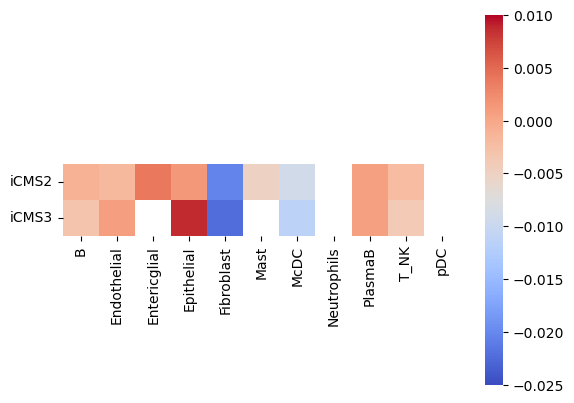

In [191]:
heatscoresemi = np.zeros((len(usedtissues),len(totaltypes)))
setscores = semisdata.obs['neuron_differentiation_score']

normalscore = np.zeros(len(totaltypes))
normalmask = semisdata.obs['origintype'] == 'Normal'
for j in range(len(totaltypes)):
    typemask = np.array(semisdata.obs['celltypes']) == totaltypes[j]
    setscore = setscores[np.logical_and(normalmask,typemask)]
    normalscore[j] = setscore.mean()

for i in range(len(usedtissues)):
    treatmask = semisdata.obs['origintype'] == usedtissues[i]
    for j in range(len(totaltypes)):
        typemask = semisdata.obs['celltypes'] == totaltypes[j]
        mask = np.logical_and(treatmask,typemask)
        setscore = setscores[mask]
        print(totaltypes[j],mask.sum())
        #if np.isnan(setscore.mean()) and mask.sum()>100:
        #    print(setscore)
        #else:
        #    print(mask.sum())
        if mask.sum()>500:
            heatscoresemi[i,j] = setscore.mean() - normalscore[j]
        else:
            heatscoresemi[i,j] = np.nan
            
sn.heatmap(heatscoresemi,xticklabels = totaltypes,yticklabels=usedtissues,cmap="coolwarm",square = True,vmax=0.01,vmin=-0.025)
plt.savefig('results/cancer_immune_response_subtype_semi.pdf')

In [192]:
sgt = np.array(heatscoregt[1:,:])
sgt = np.nan_to_num(sgt,0)
ssemi = np.array(heatscoresemi[1:,:])
ssemi = np.nan_to_num(ssemi,0)
sgt = sgt.reshape((-1))
ssemi = ssemi.reshape((-1))

In [193]:
import scipy

scipy.stats.pearsonr(sgt,ssemi)

PearsonRResult(statistic=0.9193838908604237, pvalue=6.24329353007336e-05)

In [94]:
len(totaltypes)

11

### Enrichment:  tissue Markers by Cell Type

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


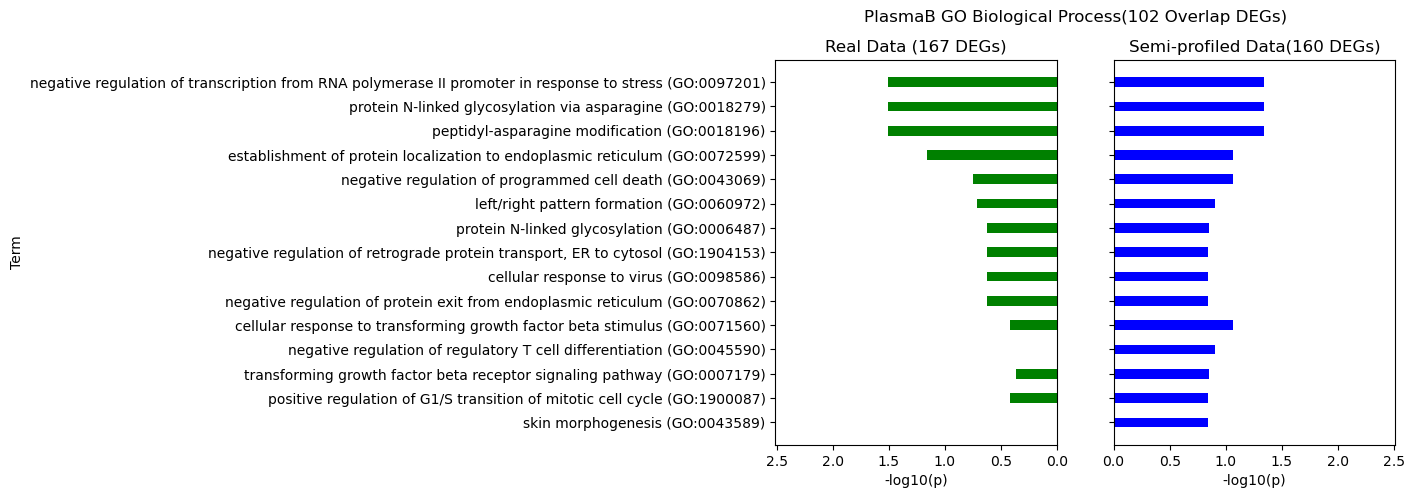

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


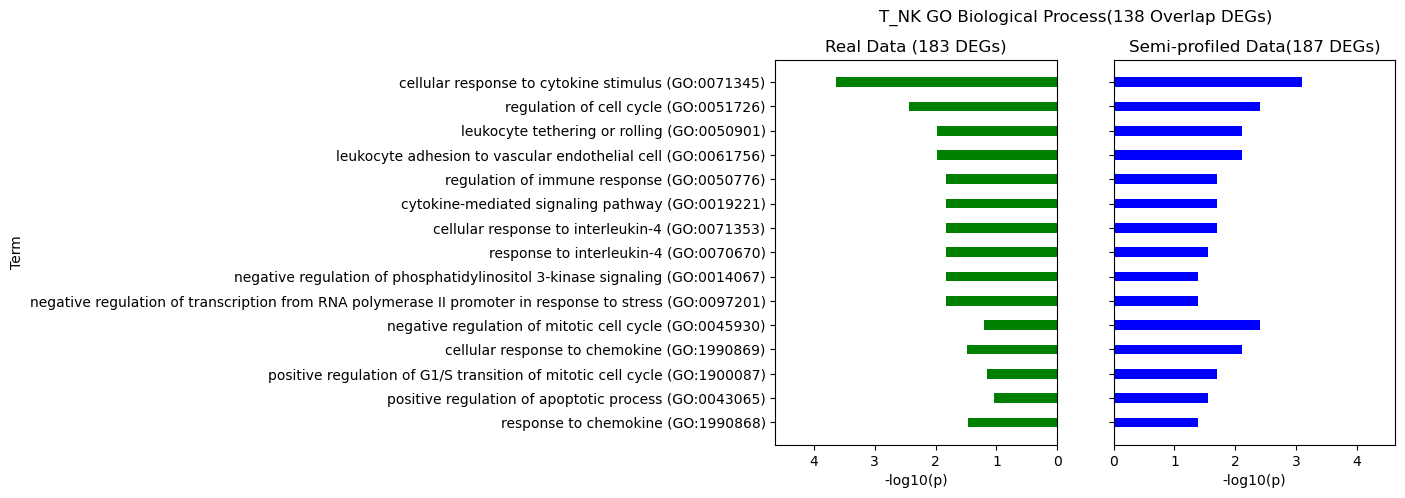

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


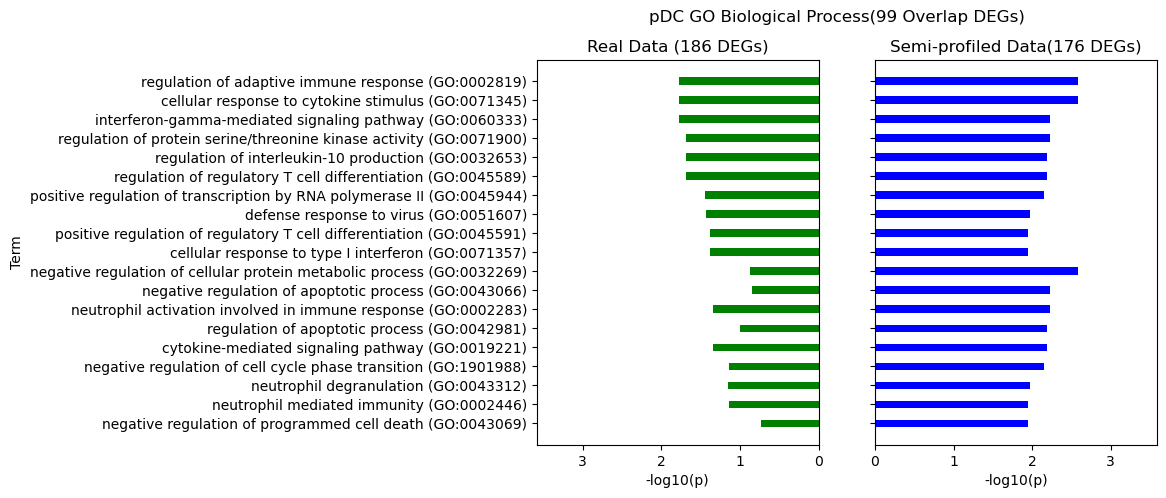

In [93]:
# GO Bio Process Terms

for selectedtype in totaltypes[8:]:

    gttypedata = gtdata[np.array(gtdata.obs['celltypes'] == selectedtype),:]
    sc.tl.rank_genes_groups(gttypedata, 'sample_origin', method='t-test')
    #sc.pl.rank_genes_groups(gtdata, n_genes=50, sharey=False)
    gtdeg = []
    for j in range(len(total_tissues)):
        for i in range(50):
            g = gttypedata.uns['rank_genes_groups']['names'][i][j]
            if g not in gtdeg:
                gtdeg.append(g)

    semistypedata = semisdata[np.array(semisdata.obs['celltypes'] == selectedtype),:]
    sc.tl.rank_genes_groups(semistypedata, 'sample_origin', method='t-test')
    #sc.pl.rank_genes_groups(gtdata, n_genes=50, sharey=False)
    #sc.pl.rank_genes_groups(semistypedata, n_genes=25, sharey=False)
    semideg = []
    for j in range(len(total_tissues)):
        for i in range(50):
            g = semistypedata.uns['rank_genes_groups']['names'][i][j]
            if g not in semideg:
                semideg.append(g)
    c=0
    for i in semideg:
        if i in gtdeg:
            c+=1

    f=open('results/tissue_marker_go/'+selectedtype + 'deg.txt','w')
    f.write('semi: '+str(len(semideg))+'\n')
    f.write('gt: '+str(len(gtdeg))+'\n')
    f.write('overlap: '+str(c)+'\n')
    f.close()
    results = gseapy.enrichr(gene_list=gtdeg, gene_sets='GO_Biological_Process_2021',outdir='gseapygt')
    f=open('gseapygt/GO_Biological_Process_2021.human.enrichr.reports.txt','r')
    lines=f.readlines()
    f.close()

    gtsets=[]
    gtps=[]
    gtdic={}
    for l in lines[1:]:
        term = l.split('\t')[1]
        p = float(l.split('\t')[4])
        gtsets.append(term)
        gtps.append(p)
        gtdic[term] = p

    results = gseapy.enrichr(gene_list=semideg, gene_sets='GO_Biological_Process_2021',outdir='gseapysemi')

    f=open('gseapysemi/GO_Biological_Process_2021.human.enrichr.reports.txt','r')
    lines=f.readlines()
    f.close()
    semisets=[]
    semips=[]
    semidic={}
    for l in lines[1:]:
        term = l.split('\t')[1]
        p = float(l.split('\t')[4])
        semisets.append(term)
        semips.append(p)
        semidic[term]=p
    terms = copy.deepcopy(gtsets[:10])
    real_data = copy.deepcopy(gtps[:10])
    sim_data = []
    for i in range(10):
        gtterm = semisets[i]
        if gtterm not in semidic.keys():
            sim_data.append(1)
        else:
            sim_data.append(semidic[gtterm])


    for i in range(10):
        if semisets[i] in terms:
            continue
        terms.append(semisets[i])
        sim_data.append(semips[i])
        if semisets[i] not in gtdic.keys():
            real_data.append(1)
        else:
            real_data.append(gtdic[semisets[i]])
    real_data = np.flip(real_data)
    sim_data = np.flip(sim_data)
    terms = np.flip(terms)
    sim_bar_lengths = [-np.log10(p) for p in sim_data]
    real_bar_lengths = [-np.log10(p) for p in real_data]
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 5))
    bar_width = 0.4
    y = np.arange(len(sim_data))+1
    ax1.barh(y, real_bar_lengths, height=bar_width, color='green', label='Real')
    ax1.set_xlabel('-log10(p)')
    ax1.set_ylabel('Term')
    ax1.set_title('Real Data ('+str(len(semideg))+' DEGs)')
    ax2.barh(y, sim_bar_lengths, height=bar_width, color='blue', label='Simulated')
    ax2.set_xlabel('-log10(p)')
    ax2.set_title('Semi-profiled Data('+str(len(gtdeg))+' DEGs)')
    max_val = max(max(sim_bar_lengths), max(real_bar_lengths))
    ax1.set_xlim(0,max_val + 1)
    ax2.set_xlim(0, max_val + 1)
    ax1.invert_xaxis()
    ax1.set_yticks(y)
    ax2.set_yticklabels(terms)
    fig.subplots_adjust(hspace=0.2)
    fig.suptitle(selectedtype + ' GO Biological Process('+str(c)+' Overlap DEGs)')
    plt.savefig('results/tissue_marker_go/'+selectedtype + ' GO Biological Process.pdf',bbox_inches='tight')
    plt.savefig('results/tissue_marker_go/'+selectedtype + ' GO Biological Process.png',dpi=600,bbox_inches='tight')
    plt.show()

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


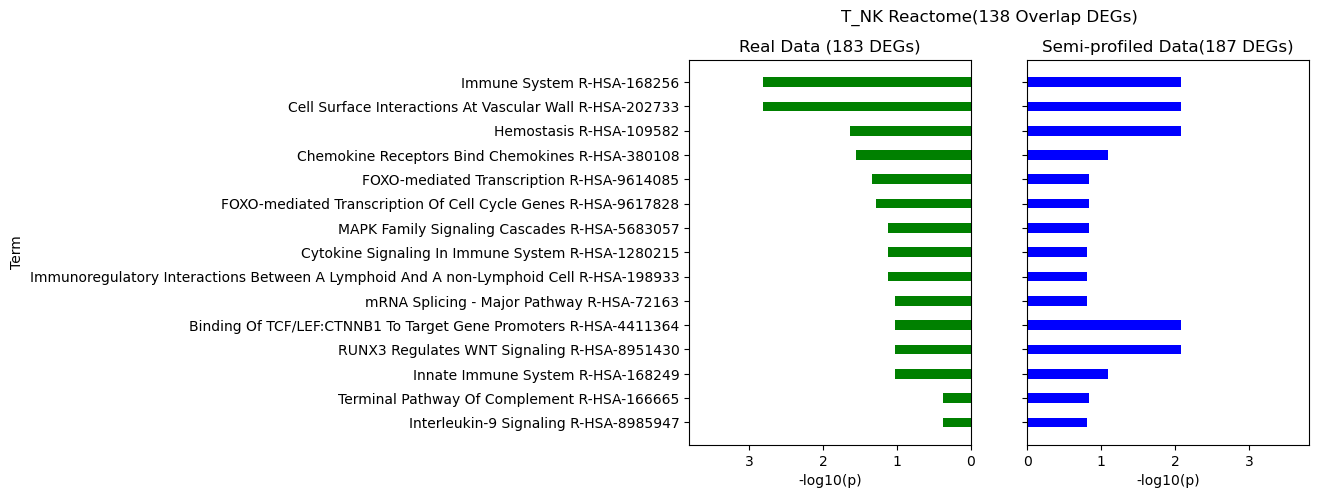

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


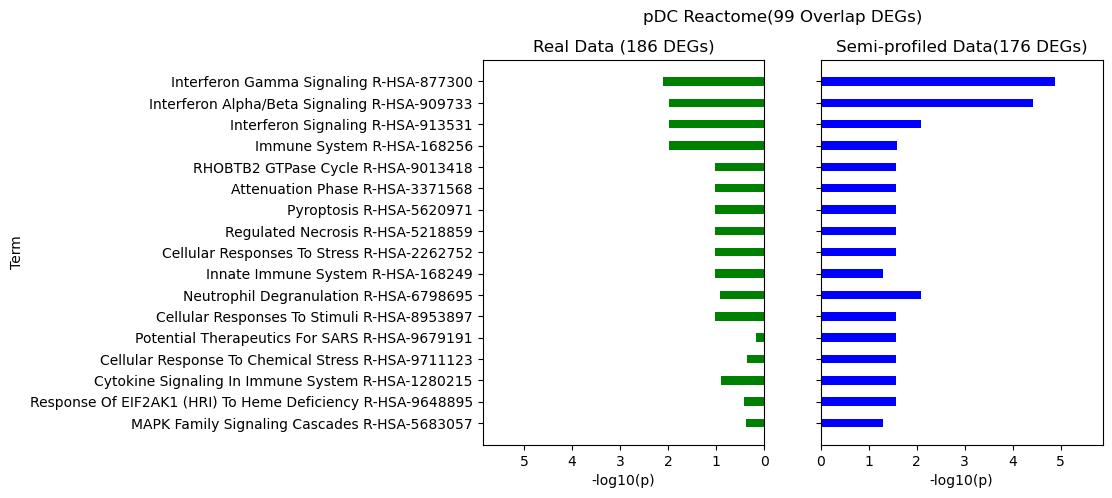

In [98]:
# Reactome terms
for selectedtype in totaltypes[9:]:
    gttypedata = gtdata[np.array(gtdata.obs['celltypes'] == selectedtype),:]
    sc.tl.rank_genes_groups(gttypedata, 'sample_origin', method='t-test')
    #sc.pl.rank_genes_groups(gtdata, n_genes=50, sharey=False)
    gtdeg = []
    for j in range(len(total_tissues)):
        for i in range(50):
            g = gttypedata.uns['rank_genes_groups']['names'][i][j]
            if g not in gtdeg:
                gtdeg.append(g)

    semistypedata = semisdata[np.array(semisdata.obs['celltypes'] == selectedtype),:]
    sc.tl.rank_genes_groups(semistypedata, 'sample_origin', method='t-test')
    #sc.pl.rank_genes_groups(gtdata, n_genes=50, sharey=False)
    #sc.pl.rank_genes_groups(semistypedata, n_genes=25, sharey=False)
    semideg = []
    for j in range(len(total_tissues)):
        for i in range(50):
            g = semistypedata.uns['rank_genes_groups']['names'][i][j]
            if g not in semideg:
                semideg.append(g)
    c=0
    for i in semideg:
        if i in gtdeg:
            c+=1

    f=open('results/tissue_marker_reactome/'+selectedtype + 'deg.txt','w')
    f.write('semi: '+str(len(semideg))+'\n')
    f.write('gt: '+str(len(gtdeg))+'\n')
    f.write('overlap: '+str(c)+'\n')
    f.close()
    results = gseapy.enrichr(gene_list=gtdeg, gene_sets='Reactome_2022',outdir='gseapygt')
    f=open('gseapygt/Reactome_2022.human.enrichr.reports.txt','r')
    lines=f.readlines()
    f.close()

    gtsets=[]
    gtps=[]
    gtdic={}
    for l in lines[1:]:
        term = l.split('\t')[1]
        p = float(l.split('\t')[4])
        gtsets.append(term)
        gtps.append(p)
        gtdic[term] = p

    results = gseapy.enrichr(gene_list=semideg, gene_sets='Reactome_2022',outdir='gseapysemi')

    f=open('gseapysemi/Reactome_2022.human.enrichr.reports.txt','r')
    lines=f.readlines()
    f.close()
    semisets=[]
    semips=[]
    semidic={}
    for l in lines[1:]:
        term = l.split('\t')[1]
        p = float(l.split('\t')[4])
        semisets.append(term)
        semips.append(p)
        semidic[term]=p
    terms = copy.deepcopy(gtsets[:10])
    real_data = copy.deepcopy(gtps[:10])
    sim_data = []
    for i in range(10):
        gtterm = semisets[i]
        if gtterm not in semidic.keys():
            sim_data.append(1)
        else:
            sim_data.append(semidic[gtterm])


    for i in range(10):
        if semisets[i] in terms:
            continue
        terms.append(semisets[i])
        sim_data.append(semips[i])
        if semisets[i] not in gtdic.keys():
            real_data.append(1)
        else:
            real_data.append(gtdic[semisets[i]])
    real_data = np.flip(real_data)
    sim_data = np.flip(sim_data)
    terms = np.flip(terms)
    sim_bar_lengths = [-np.log10(p) for p in sim_data]
    real_bar_lengths = [-np.log10(p) for p in real_data]
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 5))
    bar_width = 0.4
    y = np.arange(len(sim_data))+1
    ax1.barh(y, real_bar_lengths, height=bar_width, color='green', label='Real')
    ax1.set_xlabel('-log10(p)')
    ax1.set_ylabel('Term')
    ax1.set_title('Real Data ('+str(len(semideg))+' DEGs)')
    ax2.barh(y, sim_bar_lengths, height=bar_width, color='blue', label='Simulated')
    ax2.set_xlabel('-log10(p)')
    ax2.set_title('Semi-profiled Data('+str(len(gtdeg))+' DEGs)')
    max_val = max(max(sim_bar_lengths), max(real_bar_lengths))
    ax1.set_xlim(0,max_val + 1)
    ax2.set_xlim(0, max_val + 1)
    ax1.invert_xaxis()
    ax1.set_yticks(y)
    ax2.set_yticklabels(terms)
    fig.suptitle(selectedtype + ' Reactome('+str(c)+' Overlap DEGs)')
    plt.savefig('results/tissue_marker_reactome/'+selectedtype + ' Reactome.pdf',bbox_inches='tight')
    plt.savefig('results/tissue_marker_reactome/'+selectedtype + ' Reactome.png',dpi=600,bbox_inches='tight')
    plt.show()

### CellType Markers Enrichment

In [12]:
gtdata = anndata.read_h5ad('gtdata.h5ad')
semisdata = anndata.read_h5ad('semisdata_repmask930.h5ad')

In [42]:


### Reactome


sc.tl.rank_genes_groups(gtdata, 'celltypes', method='t-test')

typededic = {}
for j in range(totaltypes.shape[0]):
    celltype = totaltypes[j]
    typede = []
    for i in range(100):
        g = gtdata.uns['rank_genes_groups']['names'][i][j]
        typede.append(g)
        
    typededic[celltype] = typede



sc.tl.rank_genes_groups(semisdata, 'celltypes', method='t-test')

semitypededic = {}
for j in range(totaltypes.shape[0]):
    celltype = totaltypes[j]
    typede = []
    for i in range(100):
        g = semisdata.uns['rank_genes_groups']['names'][i][j]
        typede.append(g)
        
    semitypededic[celltype] = typede




In [43]:
len(totaltypes)

11

In [44]:
import scipy


# pval functions
from mpmath import *
mp.dps=500
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from mpmath import *
def comb(a,b):
    a=mp.mpf(a)
    b=mp.mpf(b)
    cab = fac(a)/fac(a-b)/fac(b)
    return cab

def hyperp(N,n1,n2,k):
    N = mp.mpf(N)
    n1 = mp.mpf(n1)
    n2 = mp.mpf(n2)
    k = mp.mpf(k)
    p = comb(n2,k)*comb(N-n2,n1-k)/comb(N,n1)
    return p 

def hypert(N,n1,n2,k):
    cdf = mp.mpf(0)
    for i in range(0,int(k)+1):
        cdf += hyperp(N,n1,n2,i)
       # print()
    return (1-cdf)

genesum = 6000
a = 100
b = 100
overlap = 94

p_value = hypert(genesum,a,b,overlap)
print(float(p_value))

1.466403272131815e-195


In [45]:
semisdata.X.shape[1]

4053

In [47]:





semisdata.write('semisdata_1025annotation.h5ad')











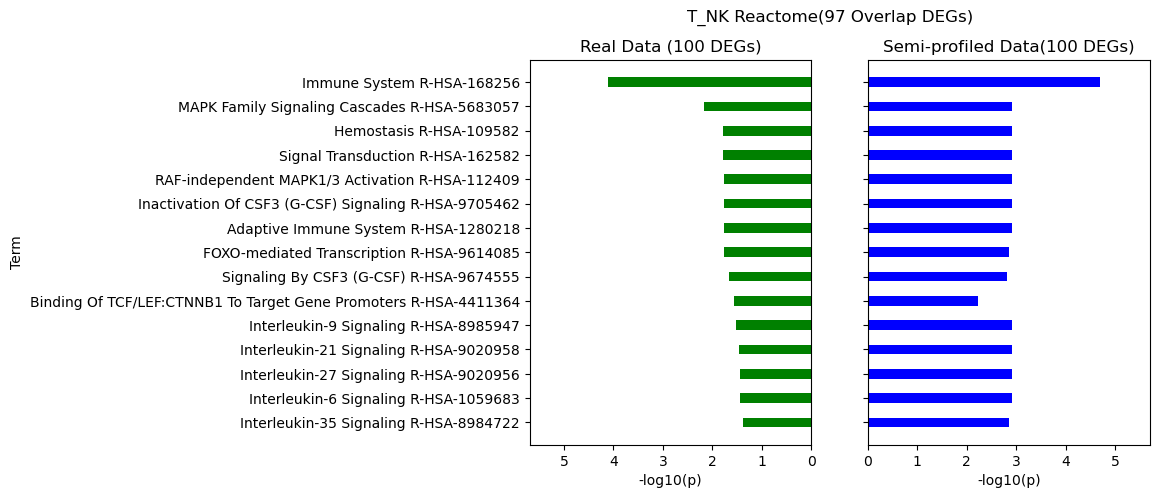

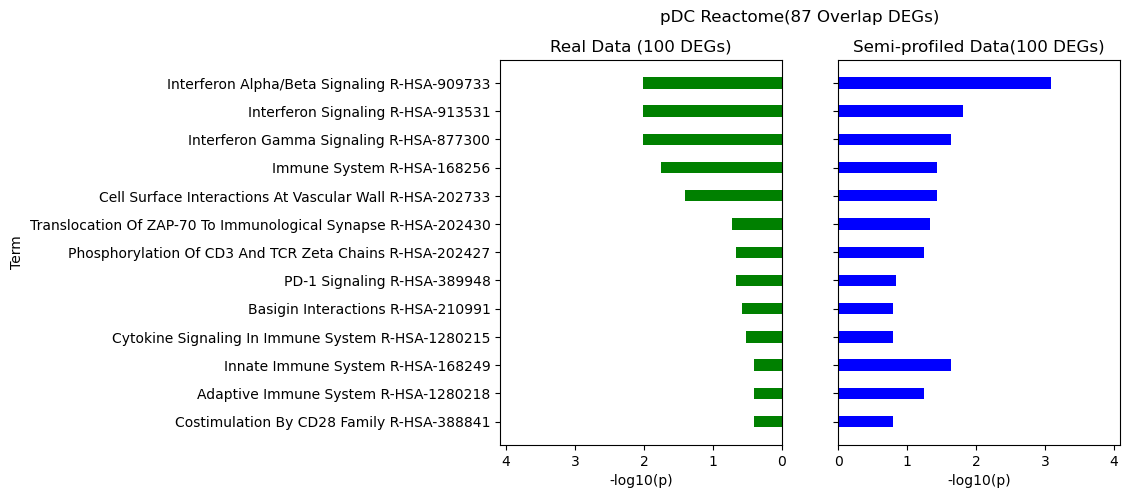

In [49]:

for j in range(9,totaltypes.shape[0]):
    selectedtype = totaltypes[j]
    c=0
    gtdeg = typededic[totaltypes[j]]
    semideg = semitypededic[totaltypes[j]]
    for i in semideg:
        if i in gtdeg:
            c+=1
            
            
    hyperpval = hypert(semisdata.X.shape[1],100,100,c)
    

    results = gseapy.enrichr(gene_list=gtdeg, gene_sets='Reactome_2022',outdir='gseapygt')
    f=open('gseapygt/Reactome_2022.human.enrichr.reports.txt','r')
    lines=f.readlines()
    f.close()

    gtsets=[]
    gtps=[]
    gtdic={}
    for l in lines[1:]:
        term = l.split('\t')[1]
        p = float(l.split('\t')[4])
        gtsets.append(term)
        gtps.append(p)
        gtdic[term] = p

    results = gseapy.enrichr(gene_list=semideg, gene_sets='Reactome_2022',outdir='gseapysemi')

    f=open('gseapysemi/Reactome_2022.human.enrichr.reports.txt','r')
    lines=f.readlines()
    f.close()
    semisets=[]
    semips=[]
    semidic={}
    for l in lines[1:]:
        term = l.split('\t')[1]
        p = float(l.split('\t')[4])
        semisets.append(term)
        semips.append(p)
        semidic[term]=p
    terms = copy.deepcopy(gtsets[:10])
    real_data = copy.deepcopy(gtps[:10])
    sim_data = []
    for i in range(10):
        gtterm = semisets[i]
        if gtterm not in semidic.keys():
            sim_data.append(1)
        else:
            sim_data.append(semidic[gtterm])


    for i in range(10):
        if semisets[i] in terms:
            continue
        terms.append(semisets[i])
        sim_data.append(semips[i])
        if semisets[i] not in gtdic.keys():
            real_data.append(1)
        else:
            real_data.append(gtdic[semisets[i]])
    real_data = np.flip(real_data)
    sim_data = np.flip(sim_data)
    terms = np.flip(terms)
    sim_bar_lengths = [-np.log10(p) for p in sim_data]
    real_bar_lengths = [-np.log10(p) for p in real_data]
    
    
    
    np.save('results/celltype_marker_reactome/' + selectedtype + '_pvals.npy',np.concatenate([(real_data).reshape((-1,1)),(sim_data).reshape((-1,1))],axis=1))
    
    res = scipy.stats.pearsonr(np.array(sim_bar_lengths),np.array(real_bar_lengths))
    f=open('results/celltype_marker_reactome/'+str(totaltypes[j])+'.txt','w')
    f.write('semi: '+str(len(semideg))+'\n')
    f.write('gt: '+str(len(gtdeg))+'\n')
    f.write('overlap: '+str(c)+'\n')
    f.write('pval:' + str(float(hyperpval))+'\n')
    f.write('pcor:' + str(res[0])+'\n')
    f.write('pcor pval:' + str(res[1]))
    f.close()
    
    
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 5))
    bar_width = 0.4
    y = np.arange(len(sim_data))+1
    ax1.barh(y, real_bar_lengths, height=bar_width, color='green', label='Real')
    ax1.set_xlabel('-log10(p)')
    ax1.set_ylabel('Term')
    ax1.set_title('Real Data ('+str(len(semideg))+' DEGs)')
    ax2.barh(y, sim_bar_lengths, height=bar_width, color='blue', label='Simulated')
    ax2.set_xlabel('-log10(p)')
    ax2.set_title('Semi-profiled Data('+str(len(gtdeg))+' DEGs)')
    max_val = max(max(sim_bar_lengths), max(real_bar_lengths))
    ax1.set_xlim(0,max_val + 1)
    ax2.set_xlim(0, max_val + 1)
    ax1.invert_xaxis()
    ax1.set_yticks(y)
    ax2.set_yticklabels(terms)
    fig.suptitle(selectedtype + ' Reactome('+str(c)+' Overlap DEGs)')
    plt.savefig('results/celltype_marker_reactome/'+selectedtype + ' Reactome.pdf',bbox_inches='tight')
    plt.savefig('results/celltype_marker_reactome/'+selectedtype + ' Reactome.png',dpi=600,bbox_inches='tight')
    plt.show()


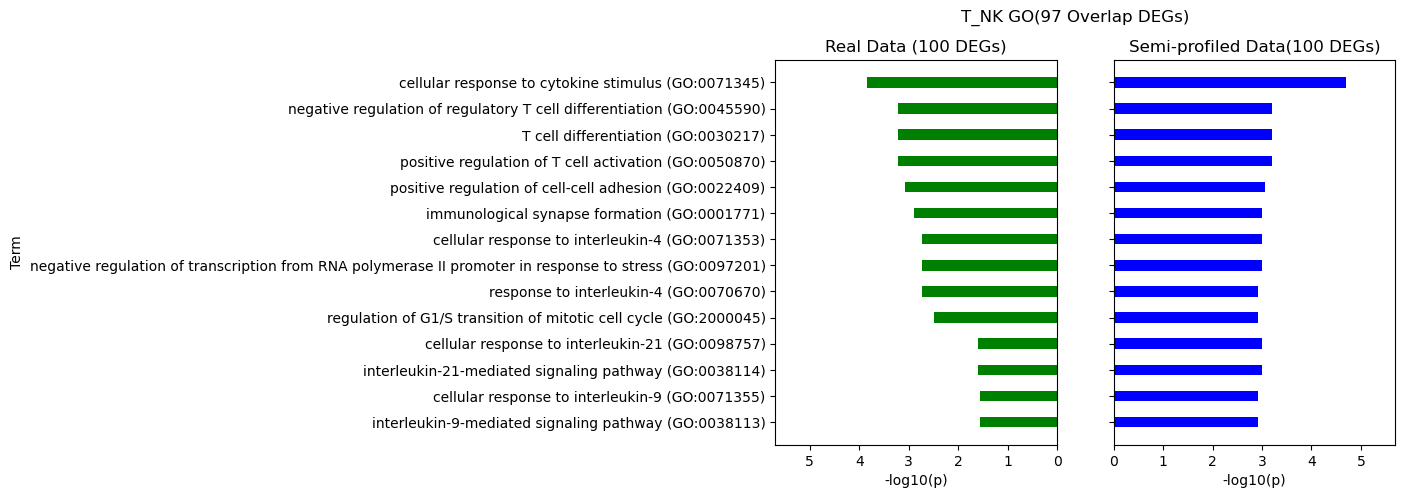

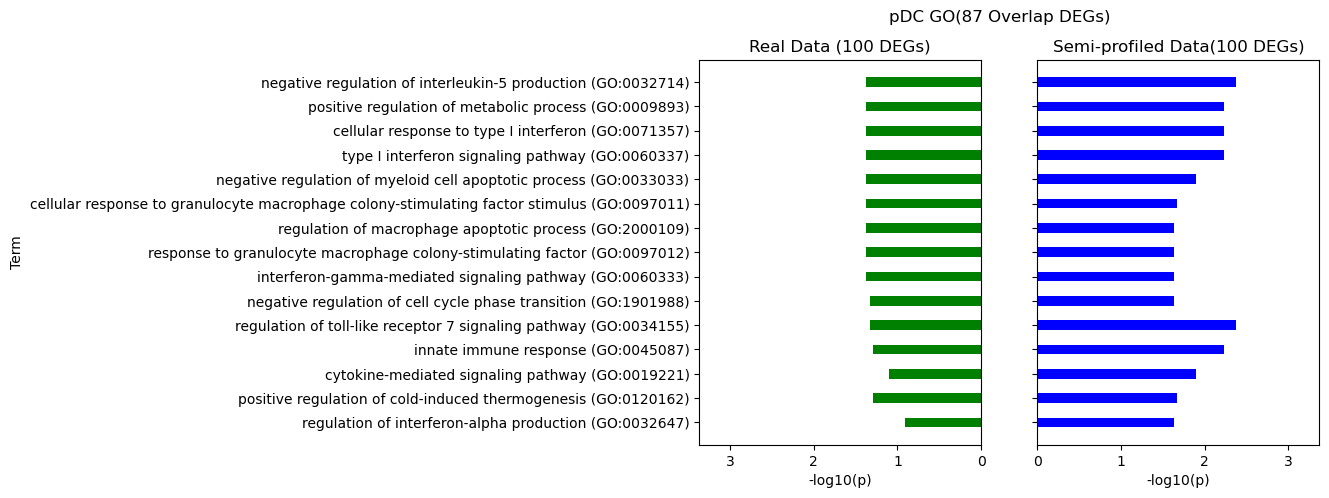

In [51]:


for j in range(9,totaltypes.shape[0]):
    selectedtype = totaltypes[j]
    c=0
    gtdeg = typededic[totaltypes[j]]
    semideg = semitypededic[totaltypes[j]]
    for i in semideg:
        if i in gtdeg:
            c+=1

            
            
    hyperpval = hypert(semisdata.X.shape[1],100,100,c)
    
    

    results = gseapy.enrichr(gene_list=gtdeg, gene_sets='GO_Biological_Process_2021',outdir='gseapygt')
    f=open('gseapygt/GO_Biological_Process_2021.human.enrichr.reports.txt','r')
    lines=f.readlines()
    f.close()

    gtsets=[]
    gtps=[]
    gtdic={}
    for l in lines[1:]:
        term = l.split('\t')[1]
        p = float(l.split('\t')[4])
        gtsets.append(term)
        gtps.append(p)
        gtdic[term] = p
        
        
    

    results = gseapy.enrichr(gene_list=semideg, gene_sets='GO_Biological_Process_2021',outdir='gseapysemi')

    f=open('gseapysemi/GO_Biological_Process_2021.human.enrichr.reports.txt','r')
    lines=f.readlines()
    f.close()
    semisets=[]
    semips=[]
    semidic={}
    for l in lines[1:]:
        term = l.split('\t')[1]
        p = float(l.split('\t')[4])
        semisets.append(term)
        semips.append(p)
        semidic[term]=p
    terms = copy.deepcopy(gtsets[:10])
    real_data = copy.deepcopy(gtps[:10])
    sim_data = []
    for i in range(10):
        gtterm = semisets[i]
        if gtterm not in semidic.keys():
            sim_data.append(1)
        else:
            sim_data.append(semidic[gtterm])


    for i in range(10):
        if semisets[i] in terms:
            continue
        terms.append(semisets[i])
        sim_data.append(semips[i])
        if semisets[i] not in gtdic.keys():
            real_data.append(1)
        else:
            real_data.append(gtdic[semisets[i]])
    real_data = np.flip(real_data)
    sim_data = np.flip(sim_data)
    terms = np.flip(terms)
    sim_bar_lengths = [-np.log10(p) for p in sim_data]
    real_bar_lengths = [-np.log10(p) for p in real_data]
    
    

    
    
    np.save('results/celltype_marker_go/' + selectedtype + '_pvals.npy',np.concatenate([(real_data).reshape((-1,1)),(sim_data).reshape((-1,1))],axis=1))
    
    res = scipy.stats.pearsonr(np.array(sim_bar_lengths),np.array(real_bar_lengths))
    f=open('results/celltype_marker_go/'+str(totaltypes[j])+'.txt','w')
    f.write('semi: '+str(len(semideg))+'\n')
    f.write('gt: '+str(len(gtdeg))+'\n')
    f.write('overlap: '+str(c)+'\n')
    f.write('pval:' + str(float(hyperpval))+'\n')
    f.write('pcor:' + str(res[0])+'\n')
    f.write('pcor pval:' + str(res[1]))
    f.close()
    
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 5))
    bar_width = 0.4
    y = np.arange(len(sim_data))+1
    ax1.barh(y, real_bar_lengths, height=bar_width, color='green', label='Real')
    ax1.set_xlabel('-log10(p)')
    ax1.set_ylabel('Term')
    ax1.set_title('Real Data ('+str(len(semideg))+' DEGs)')
    ax2.barh(y, sim_bar_lengths, height=bar_width, color='blue', label='Simulated')
    ax2.set_xlabel('-log10(p)')
    ax2.set_title('Semi-profiled Data('+str(len(gtdeg))+' DEGs)')
    max_val = max(max(sim_bar_lengths), max(real_bar_lengths))
    ax1.set_xlim(0,max_val + 1)
    ax2.set_xlim(0, max_val + 1)
    ax1.invert_xaxis()
    ax1.set_yticks(y)
    ax2.set_yticklabels(terms)
    fig.suptitle(selectedtype + ' GO('+str(c)+' Overlap DEGs)')
    plt.savefig('results/celltype_marker_go/'+selectedtype + ' GO .pdf',bbox_inches='tight')
    plt.savefig('results/celltype_marker_go/'+selectedtype + ' GO .png',dpi=600,bbox_inches='tight')
    plt.show()

### End of Enrichment

In [14]:
gtdata = anndata.read_h5ad('gtdata.h5ad')

In [11]:
semisdata = anndata.read_h5ad('semisdata_1025annotation.h5ad')

In [24]:
gtdata

AnnData object with n_obs × n_vars = 214358 × 4053
    obs: 'patient_ids', 'celltypes', 'sample_ids', 'sample_origin'
    var: 'gene_symbols'
    uns: 'neighbors', 'paga', 'celltypes_sizes', 'celltypes_colors'
    obsm: 'X_pca'
    obsp: 'distances', 'connectivities'

## PAGA

In [16]:
sc.pp.neighbors(semisdata,use_rep='X_pca',n_neighbors=50)

In [17]:
sc.tl.paga(semisdata,groups = 'celltypes')

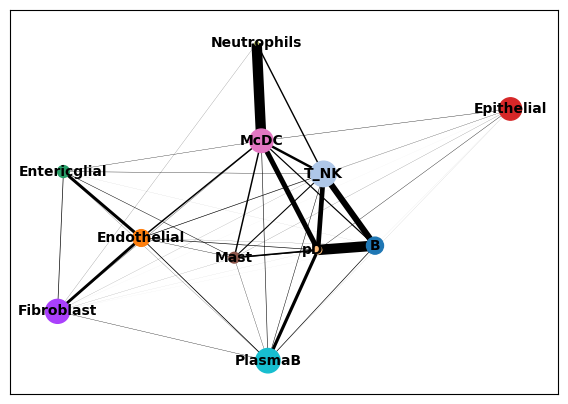

In [18]:
sc.pl.paga(semisdata, plot=True,threshold=0,save='semi_paga_t10.pdf')

In [19]:
sc.pp.neighbors(gtdata,use_rep='X_pca',n_neighbors=50)

In [20]:
sc.tl.paga(gtdata, groups = 'celltypes')

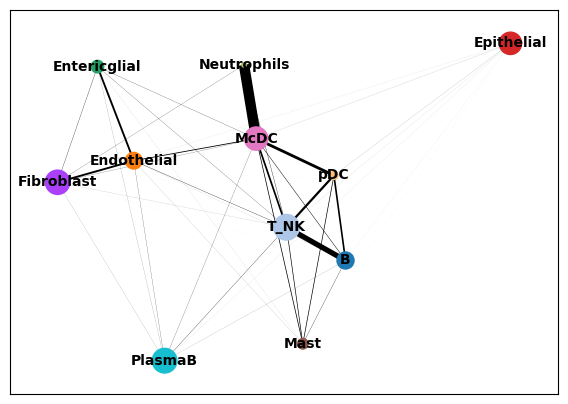

In [21]:
sc.pl.paga(gtdata, plot=True,threshold=0,save='gt_paga_t10.pdf')

In [22]:
semisdata.write('semisdata_withcelltype.h5ad')
gtdata.write('gtdata_withcelltype.h5ad')


In [23]:
gtpaga = np.array(gtdata.uns['paga']['connectivities'].todense())
semipaga = np.array(semisdata.uns['paga']['connectivities'].todense())
gtpaga = gtpaga.reshape((-1))
semipaga= semipaga.reshape((-1))
scipy.stats.pearsonr(gtpaga,semipaga)

PearsonRResult(statistic=0.8301384853310456, pvalue=5.63568076172623e-32)

In [128]:
path = ['Mono_prolif','CD14','CD16']

### Marker genes dotplot

In [112]:
totaltypes = np.unique(gtdata.obs['celltypes'])

In [113]:
sc.tl.rank_genes_groups(gtdata, 'celltypes', method='t-test')

In [114]:
sc.tl.rank_genes_groups(semisdata, 'celltypes', method='t-test')

In [115]:
gt_markers = []
semi_markers = []
semit_markers = []
for j in range(totaltypes.shape[0]):
    typede = []
    for i in range(4):
        g = gtdata.uns['rank_genes_groups']['names'][i][j]
        typede.append(g)
    gt_markers = gt_markers + typede
    
    typede = []
    for i in range(4):
        g = semisdata.uns['rank_genes_groups']['names'][i][j]
        typede.append(g)
    semi_markers = semi_markers + typede

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


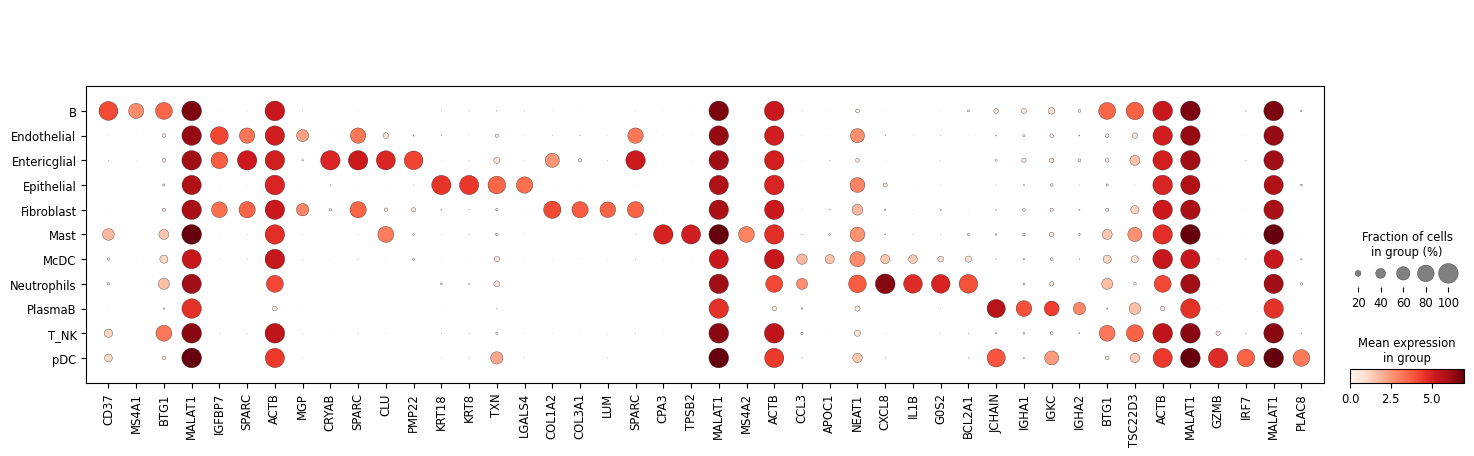

In [116]:
sc.pl.dotplot(gtdata, gt_markers, groupby='celltypes',save = 'cancerdot_gt.pdf')#.style(cmap='Blues',dot_edge_color='black', dot_edge_lw=1).swap_axes(False).show(True)

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


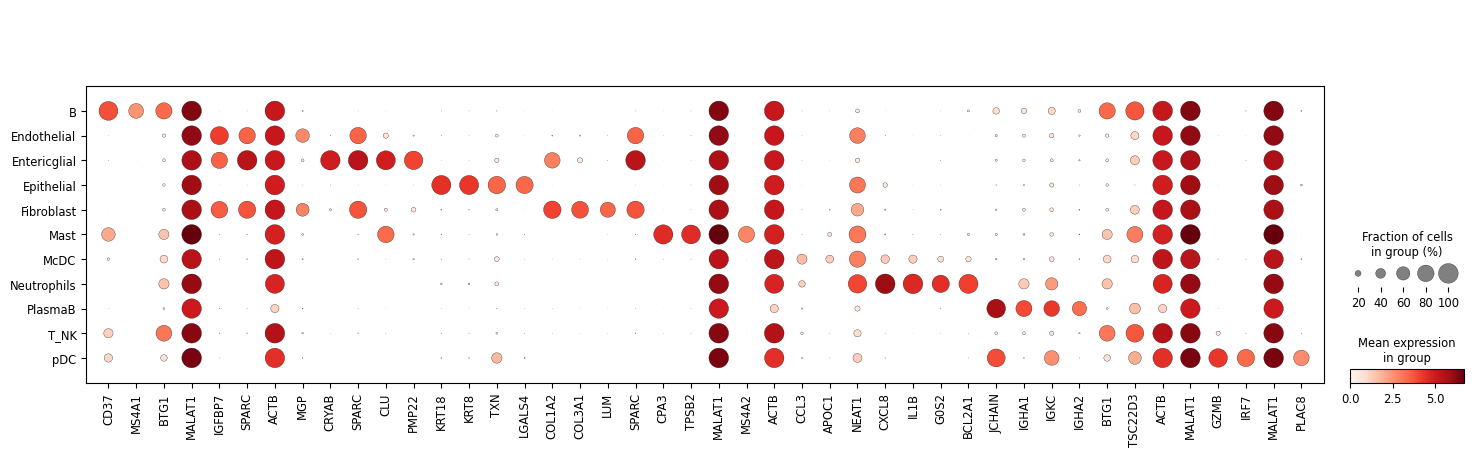

In [117]:
sc.pl.dotplot(semisdata, gt_markers, groupby='celltypes',save = 'cancerdot_semi.pdf')#.style(cmap='Blues',dot_edge_color='black', dot_edge_lw=1).swap_axes(False).show(True)

In [118]:
### semilarity

dpgt = sc.pl.dotplot(gtdata, gt_markers, groupby='celltypes',return_fig=True)
dpgtsize = (dpgt.dot_size_df.to_numpy())
dpgtcolor = (dpgt.dot_color_df.to_numpy())

In [119]:
dp = sc.pl.dotplot(semisdata, gt_markers, groupby='celltypes',return_fig=True)
dpcolor = (dp.dot_color_df.to_numpy())
dpsize = (dp.dot_size_df.to_numpy())

In [120]:
from scipy import stats
res = stats.pearsonr(dpgtsize.flatten(), dpsize.flatten())
print('size',res)
res = stats.pearsonr(dpgtcolor.flatten(), dpcolor.flatten())
print('color',res)

size PearsonRResult(statistic=0.9944403358493317, pvalue=0.0)
color PearsonRResult(statistic=0.9956058965905632, pvalue=0.0)


## RRHO

In [121]:
# find both positivee and negative markers
sc.tl.rank_genes_groups(gtdata, 'celltypes', method='t-test',rankby_abs=True)

In [122]:
sc.tl.rank_genes_groups(semisdata, 'celltypes', method='t-test',rankby_abs=True)

In [275]:
#sc.tl.rank_genes_groups(semisdatat, 'celltypes', method='t-test',rankby_abs=True)

In [123]:
from mpmath import *
mp.dps=200

In [38]:
float(hypert(gtdata.X.shape[1],10,10,5))

7.165503606062025e-15

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from mpmath import *
def c(a,b):
    a=mp.mpf(a)
    b=mp.mpf(b)
    cab = fac(a)/fac(a-b)/fac(b)
    return cab

def hyperp(N,n1,n2,k):
    N = mp.mpf(N)
    n1 = mp.mpf(n1)
    n2 = mp.mpf(n2)
    k = mp.mpf(k)
    p = c(n2,k)*c(N-n2,n1-k)/c(N,n1)
    return p 

def hypert(N,n1,n2,k):
    cdf = mp.mpf(0)
    for i in range(0,int(k)+1):
        cdf += hyperp(N,n1,n2,i)
       # print()
    return (1-cdf)

def rrho_plot(list1, list2, list3, list4, celltype,upperbound=5):

    
    n1 = len(list1) # gt pos
    n2 = len(list2) # semi pos
    n3 = len(list3) # gt neg
    n4 = len(list4) # semi neg

    # Calculate the maximum rank to consider
    max_rank1 = max(n3, n2)
    max_rank2 = max(n3, n4)
    max_rank3 = max(n1, n2)
    max_rank4 = max(n1, n4)

    # Initialize the RRHO plot matrix
    rrho_matrix1 = np.zeros((max_rank1, max_rank1))
    rrho_matrix2 = np.zeros((max_rank2, max_rank2))
    rrho_matrix3 = np.zeros((max_rank3, max_rank3))
    rrho_matrix4 = np.zeros((max_rank4, max_rank4))
    
    # Iterate over different cutoff ranks
    upper=1e-50
    ## ax1 
    for rank1 in range(1, max_rank1 + 1):
        for rank2 in range(1, max_rank1 + 1):
            # Get the top genes up to the cutoff ranks
            top_genes1 = set(list1[:rank1])
            top_genes2 = set(list4[:rank2])
            union = np.unique(list(top_genes1) + list(top_genes2))
            # Calculate the overlap between the two gene sets
            overlap = len(top_genes1.intersection(top_genes2))
            # Calculate the hypergeometric p-value for the overlap
            p_value = hypert(gtdata.X.shape[1],rank1,rank2,overlap)#1 - scipy.stats.hypergeom.cdf(overlap, 6000, rank1, rank2)
            #print(p_value)
            p_value = float(p_value)
            if p_value < upper:
                p_value = upper
            if np.isnan(p_value):
                print(overlap, len(union), rank1, rank2)
            # Store the negative logarithm of the p-value in the RRHO matrix
            rrho_matrix1[rank1 - 1, rank2 - 1] = -np.log10(p_value)
    #ax2
    for rank1 in range(1, max_rank2 + 1):
        for rank2 in range(1, max_rank2 + 1):
            # Get the top genes up to the cutoff ranks
            top_genes1 = set(list1[:rank1])
            top_genes2 = set(list2[:rank2])
            union = np.unique(list(top_genes1) + list(top_genes2))
            # Calculate the overlap between the two gene sets
            overlap = len(top_genes1.intersection(top_genes2))
            # Calculate the hypergeometric p-value for the overlap
            p_value = hypert(gtdata.X.shape[1],rank1,rank2,overlap)#1 - scipy.stats.hypergeom.cdf(overlap, 6000, rank1, rank2)
            #print(p_value)
            p_value = float(p_value)
            if p_value < upper:
                p_value = upper
            if np.isnan(p_value):
                print(overlap, len(union), rank1, rank2)
            # Store the negative logarithm of the p-value in the RRHO matrix
            rrho_matrix2[rank1 - 1, rank2 - 1] = -np.log10(p_value)
            
    for rank1 in range(1, max_rank3 + 1):
        for rank2 in range(1, max_rank3 + 1):
            # Get the top genes up to the cutoff ranks
            top_genes1 = set(list3[:rank1])
            top_genes2 = set(list4[:rank2])
            union = np.unique(list(top_genes1) + list(top_genes2))
            # Calculate the overlap between the two gene sets
            overlap = len(top_genes1.intersection(top_genes2))
            # Calculate the hypergeometric p-value for the overlap
            p_value = hypert(gtdata.X.shape[1],rank1,rank2,overlap)#1 - scipy.stats.hypergeom.cdf(overlap, 6000, rank1, rank2)
            #print(p_value)
            p_value = float(p_value)
            if p_value < upper:
                p_value = upper
            if np.isnan(p_value):
                print(overlap, len(union), rank1, rank2)
            # Store the negative logarithm of the p-value in the RRHO matrix
            rrho_matrix3[rank1 - 1, rank2 - 1] = -np.log10(p_value)
            
    for rank1 in range(1, max_rank4 + 1):
        for rank2 in range(1, max_rank4 + 1):
            # Get the top genes up to the cutoff ranks
            top_genes1 = set(list3[:rank1])
            top_genes2 = set(list2[:rank2])
            union = np.unique(list(top_genes1) + list(top_genes2))
            # Calculate the overlap between the two gene sets
            overlap = len(top_genes1.intersection(top_genes2))
            # Calculate the hypergeometric p-value for the overlap
            p_value = hypert(gtdata.X.shape[1],rank1,rank2,overlap)#1 - scipy.stats.hypergeom.cdf(overlap, 6000, rank1, rank2)
            #print(p_value)
            p_value = float(p_value)
            if p_value < upper:
                p_value = upper
            if np.isnan(p_value):
                print(overlap, len(union), rank1, rank2)
            # Store the negative logarithm of the p-value in the RRHO matrix
            rrho_matrix4[rank1 - 1, rank2 - 1] = -np.log10(p_value)
            
            
    fig, axs = plt.subplots(2, 2,figsize=(6,6))

    cmap = 'magma'#'coolwarm' # inferno
    
    rrho_matrix2 = np.flip(rrho_matrix2,axis=1)
    rrho_matrix3 = np.flip(rrho_matrix3,axis=0)
    rrho_matrix4 = np.flip(np.flip(rrho_matrix4,axis=0),axis=1)
    
    vmx = 30
    # Plot heatmap in the first quadrant
    im1 = axs[0, 0].imshow(rrho_matrix1, cmap=cmap,vmax=vmx, aspect='auto')
    axs[0, 0].set_xticks([])
    axs[0, 0].set_yticks([])
    # Plot heatmap in the second quadrant
    im2 = axs[0, 1].imshow(rrho_matrix2, cmap=cmap,vmax=vmx, aspect='auto')
    axs[0, 1].set_xticks([])
    axs[0, 1].set_yticks([])
    # Plot heatmap in the third quadrant
    im3 = axs[1, 0].imshow(rrho_matrix3, cmap=cmap,vmax=vmx, aspect='auto')
    axs[1, 0].set_xticks([])
    axs[1, 0].set_yticks([])
    # Plot heatmap in the fourth quadrant
    im4 = axs[1, 1].imshow(rrho_matrix4, cmap=cmap,vmax=vmx, aspect='auto')
    axs[1, 1].set_xticks([])
    axs[1, 1].set_yticks([])
    #plt.title(celltype + ' Markers RRHO Plot')
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.savefig('results/RRHO50_'+celltype+'.pdf')
    plt.show()
    # Plot the RRHO heatmap
    
    plt.imshow(rrho_matrix2, cmap=cmap, aspect='auto')
    plt.colorbar(label='-log10(p)')
    #plt.xlabel('Semii-profiled Markers')
    #plt.ylabel('Real Markers')
    #plt.title(celltype + ' Markers RRHO Plot')

    plt.xticks(list(range(0,n1,n1//10))) 
    plt.yticks(list(range(0,n2,n2//10))) 

    #plt.clim(0,upperbound)
    plt.savefig('results/RRHO50_colorbar.pdf')
    plt.show()
    
    return rrho_matrix1,rrho_matrix2,rrho_matrix3,rrho_matrix4




In [125]:
def rrho(j=0,nummarkers=100,upperbound=5):
    gt_markers1 = []
    semi_markers1 = []

    celltype = totaltypes[j]

    for i in range(nummarkers):
        g = gtdata.uns['rank_genes_groups']['names'][i][j]
        gt_markers1.append(g)
    for i in range(nummarkers):
        g = semisdatat.uns['rank_genes_groups']['names'][i][j]
        semi_markers1.append(g)

    rmat = rrho_plot(gt_markers1, semi_markers1,celltype,upperbound)

In [126]:
mp.dps=200

T_NK
1


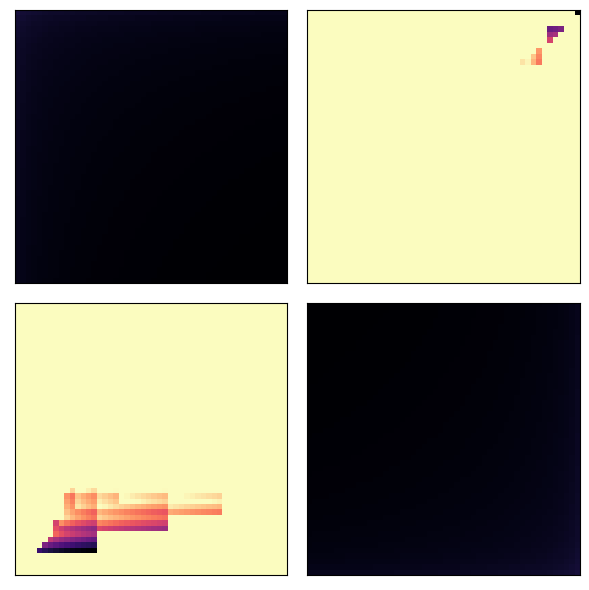

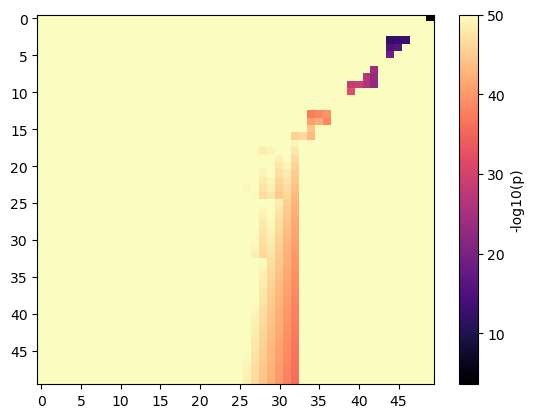

pDC
1


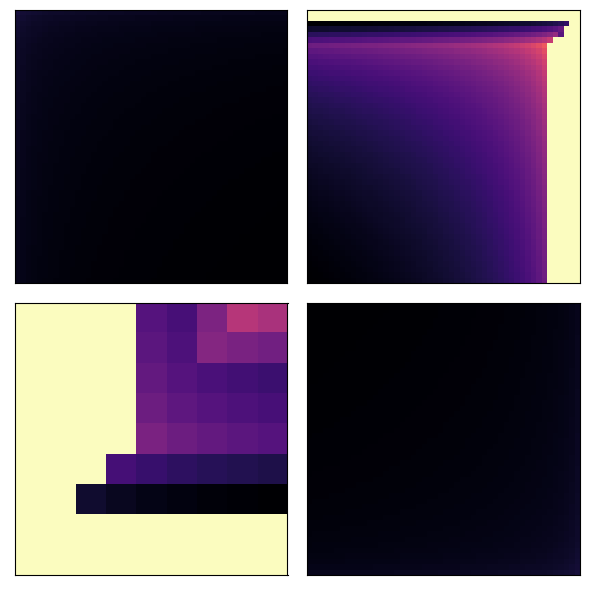

ValueError: range() arg 3 must not be zero

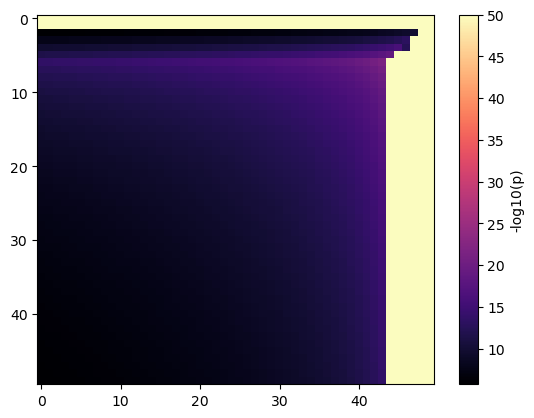

In [128]:
upperbound=50
for j in range(9,len(totaltypes)):
    celltype = totaltypes[j]
    print(celltype)

    nummarkers = 1000
    gt_posmarkers = []
    gt_negmarkers = []
    semi_posmarkers = []
    semi_negmarkers = []
    
    # gt
    for i in range(nummarkers):
        g = gtdata.uns['rank_genes_groups']['names'][i][j]
        score = gtdata.uns['rank_genes_groups']['scores'][i][j]
        if score > 0:
            gt_posmarkers.append(g)
        else:
            gt_negmarkers.append(g)
    #semii
    for i in range(nummarkers):
        g = semisdata.uns['rank_genes_groups']['names'][i][j]
        score = semisdata.uns['rank_genes_groups']['scores'][i][j]
        if score > 0:
            semi_posmarkers.append(g)
        else:
            semi_negmarkers.append(g)

    ngenes = 50
    gt_posmarkers = gt_posmarkers[:ngenes]
    semi_posmarkers = semi_posmarkers[:ngenes]
    gt_negmarkers = gt_negmarkers[:ngenes]
    semi_negmarkers = semi_negmarkers[:ngenes]
    #print(len(gt_posmarkers))
    #print(len(semi_posmarkers))
    #print(len(gt_negmarkers))
    #print(len(semi_negmarkers))
    print(1)
    rmat = rrho_plot(list1 = gt_posmarkers, \
                     list2 = semi_posmarkers,\
                     list3 = gt_negmarkers,\
                     list4 = semi_negmarkers,\
                     celltype = celltype, upperbound = upperbound)

In [ ]:
totalterms = 14
print('pval:',float(hypert(6000,10,10,20 - totalterms)))

In [ ]:
1 - scipy.stats.hypergeom.cdf(13, 6000, 10, 10)

In [162]:
semisdata.write('lastsemi.h5ad')

In [163]:
gtdata.write('lastgt.h5ad')

In [164]:
alldata.write('lastall.h5ad')

In [338]:
Normalsemi = semisdatat[semisdatat.obs['sample_origin']=='Normal']
Normalgt = gtdata[gtdata.obs['sample_origin']=='Normal']

LymphNodesemi = semisdatat[semisdatat.obs['sample_origin']=='LymphNode']
LymphNodegt = gtdata[gtdata.obs['sample_origin']=='LymphNode']

Tumoresemi = semisdatat[semisdatat.obs['sample_origin']=='Tumor']
Tumoregt = gtdata[gtdata.obs['sample_origin']=='Tumor']

Tumor2semi = semisdatat[semisdatat.obs['sample_origin']=='Tumor-2']
Tumor2gt = gtdata[gtdata.obs['sample_origin']=='Tumor-2']


In [223]:
tumormaskgt = []
for i in range(gtdata.X.shape[0]):
    if (gtdata.obs['sample_origin'][i]=='Tumor') or (gtdata.obs['sample_origin'][i]=='Tumor-2'):
        tumormaskgt.append(True)
    else:
        tumormaskgt.append(False)

tumormasksemi = []
for i in range(semisdata.X.shape[0]):
    if (semisdata.obs['sample_origin'][i]=='Tumor') or (semisdata.obs['sample_origin'][i]=='Tumor-2'):
        tumormasksemi.append(True)
    else:
        tumormasksemi.append(False)


In [221]:
np.sum(tumormasksemi)

147327

In [224]:
Tumors = gtdata[tumormaskgt]
Tumorssemi = semisdata[tumormasksemi]

In [226]:

sps = sparse.csr_matrix(Tumors.X)
Tumorssps = anndata.AnnData(sps)
Tumorssps.obs = Tumors.obs
Tumorssps.var = Tumors.var
Tumorssps.obsm = Tumors.obsm
Tumorssps.uns = Tumors.uns
Tumorssps.write('Tumorssps.h5ad')


In [227]:
sps = sparse.csr_matrix(Tumorssemi.X)
Tumorssemisps = anndata.AnnData(sps)
Tumorssemisps.obs = Tumorssemi.obs
Tumorssemisps.var = Tumorssemi.var
Tumorssemisps.obsm = Tumorssemi.obsm
Tumorssemisps.uns = Tumorssemi.uns
Tumorssemisps.write('Tumorssemisps.h5ad')


In [340]:
Normalsemi.write('Normalsemi.h5ad')
Normalgt.write('Normalgt.h5ad')

LymphNodesemi.write('LymphNodesemi.h5ad')
LymphNodegt.write('LymphNodegt.h5ad')

Tumoresemi.write('Tumoresemi.h5ad')
Tumoregt.write('Tumoregt.h5ad')

Tumor2semi.write('Tumor2semi.h5ad')
Tumor2gt.write('Tumor2gt.h5ad')

In [195]:

from scipy import sparse

icms2semi = semisdata[semisdata.obs['origintype']=='iCMS2']
icms2 = gtdata[gtdata.obs['origintype']=='iCMS2']
icms3semi = semisdata[semisdata.obs['origintype']=='iCMS3']
icms3 = gtdata[gtdata.obs['origintype']=='iCMS3']

sps = sparse.csr_matrix(icms2semi.X)
icms2semisps = anndata.AnnData(sps)
icms2semisps.obs = icms2semi.obs
icms2semisps.var = icms2semi.var
icms2semisps.obsm = icms2semi.obsm
icms2semisps.uns = icms2semi.uns
icms2semisps.write('icms2semisps.h5ad')



sps = sparse.csr_matrix(icms3semi.X)
icms3semisps = anndata.AnnData(sps)
icms3semisps.obs = icms3semi.obs
icms3semisps.var = icms3semi.var
icms3semisps.obsm = icms3semi.obsm
icms3semisps.uns = icms3semi.uns
icms3semisps.write('icms3semisps.h5ad')




sps = sparse.csr_matrix(icms2.X)
icms2sps = anndata.AnnData(sps)
icms2sps.obs = icms2.obs
icms2sps.var = icms2.var
icms2sps.obsm = icms2.obsm
icms2sps.uns = icms2.uns
icms2sps.write('icms2sps.h5ad')



sps = sparse.csr_matrix(icms3.X)
icms3sps = anndata.AnnData(sps)
icms3sps.obs = icms3.obs
icms3sps.var = icms3.var
icms3sps.obsm = icms3.obsm
icms3sps.uns = icms3.uns
icms3sps.write('icms3sps.h5ad')




In [199]:
icms2.obs['origintype']

4006      iCMS2
4007      iCMS2
4008      iCMS2
4009      iCMS2
4010      iCMS2
          ...  
191918    iCMS2
191919    iCMS2
191920    iCMS2
191921    iCMS2
191922    iCMS2
Name: origintype, Length: 92997, dtype: category
Categories (1, object): ['iCMS2']

In [200]:
icms3.obs['origintype']


0         iCMS3
1         iCMS3
2         iCMS3
3         iCMS3
4         iCMS3
          ...  
211812    iCMS3
211813    iCMS3
211814    iCMS3
211815    iCMS3
211816    iCMS3
Name: origintype, Length: 55090, dtype: category
Categories (1, object): ['iCMS3']

In [341]:
sps = sparse.csr_matrix(Normalsemi.X)
Normalsemisps = anndata.AnnData(sps)
Normalsemisps.obs = Normalsemi.obs
Normalsemisps.var = Normalsemi.var
Normalsemisps.obsm = Normalsemi.obsm
Normalsemisps.uns = Normalsemi.uns
Normalsemisps.write('Normalsemisps.h5ad')


sps = sparse.csr_matrix(Normalgt.X)
Normalgtsps = anndata.AnnData(sps)
Normalgtsps.obs = Normalgt.obs
Normalgtsps.var = Normalgt.var
Normalgtsps.obsm = Normalgt.obsm
Normalgtsps.uns = Normalgt.uns
Normalgtsps.write('Normalgtsps.h5ad')


sps = sparse.csr_matrix(LymphNodesemi.X)
LymphNodesemisps = anndata.AnnData(sps)
LymphNodesemisps.obs = LymphNodesemi.obs
LymphNodesemisps.var = LymphNodesemi.var
LymphNodesemisps.obsm = LymphNodesemi.obsm
LymphNodesemisps.uns = LymphNodesemi.uns
LymphNodesemisps.write('LymphNodesemisps.h5ad')



sps = sparse.csr_matrix(LymphNodegt.X)
LymphNodegtsps = anndata.AnnData(sps)
LymphNodegtsps.obs = LymphNodegt.obs
LymphNodegtsps.var = LymphNodegt.var
LymphNodegtsps.obsm = LymphNodegt.obsm
LymphNodegtsps.uns = LymphNodegt.uns
LymphNodegtsps.write('LymphNodegtsps.h5ad')


sps = sparse.csr_matrix(Tumoresemi.X)
Tumoresemisps = anndata.AnnData(sps)
Tumoresemisps.obs = Tumoresemi.obs
Tumoresemisps.var = Tumoresemi.var
Tumoresemisps.obsm = Tumoresemi.obsm
Tumoresemisps.uns = Tumoresemi.uns
Tumoresemisps.write('Tumoresemisps.h5ad')


sps = sparse.csr_matrix(Tumoregt.X)
Tumoregtsps = anndata.AnnData(sps)
Tumoregtsps.obs = Tumoregt.obs
Tumoregtsps.var = Tumoregt.var
Tumoregtsps.obsm = Tumoregt.obsm
Tumoregtsps.uns = Tumoregt.uns
Tumoregtsps.write('Tumoregtsps.h5ad')


sps = sparse.csr_matrix(Tumor2semi.X)
Tumor2semisps = anndata.AnnData(sps)
Tumor2semisps.obs = Tumor2semi.obs
Tumor2semisps.var = Tumor2semi.var
Tumor2semisps.obsm = Tumor2semi.obsm
Tumor2semisps.uns = Tumor2semi.uns
Tumor2semisps.write('Tumor2semisps.h5ad')


sps = sparse.csr_matrix(Tumor2gt.X)
Tumor2gtsps = anndata.AnnData(sps)
Tumor2gtsps.obs = Tumor2gt.obs
Tumor2gtsps.var = Tumor2gt.var
Tumor2gtsps.obsm = Tumor2gt.obsm
Tumor2gtsps.uns = Tumor2gt.uns
Tumor2gtsps.write('Tumor2gtsps.h5ad')


In [342]:
Normalsemi

View of AnnData object with n_obs × n_vars = 55180 × 4053
    obs: 'patient_ids', 'sample_ids', 'sample_origin', 'celltypes'
    var: 'gene_symbols'
    uns: 'rank_genes_groups', 'celltypes_colors'
    obsm: 'X_pca_a', 'X_umap_a', 'X_umap', 'X_umap_sc_a'

In [135]:
from scipy import sparse

In [136]:


#selected_types=['B_cell', 'CD14', 'CD16', 'CD4', 'CD8', 'DCs']
for ctype in totaltypes:
    
    semitypedata = semisdata[semisdata.obs['celltypes']==ctype]
    gttypeda = gtdata[gtdata.obs['celltypes']==ctype]

    # gttypeda.write(str(ctype)+'_gtdata.h5ad')
    # semitypedata.write(str(ctype)+'_semidata.h5ad')
        
    print(str(ctype)+'_semidata_sparse.h5ad',str(gttypedata.X.shape[0]))
    
    gtsps = sparse.csr_matrix(np.array(gttypeda.X))
    semisps = sparse.csr_matrix(np.array(semitypedata.X))
    
    gttypedata = anndata.AnnData(gtsps)
    gttypedata.obs = gttypeda.obs
    gttypedata.var = gttypeda.var
    gttypedata.obsm = gttypeda.obsm
    gttypedata.uns = gttypeda.uns
    gttypedata.obsp = gttypeda.obsp
    
    semitypedatasps = anndata.AnnData(semisps)
    semitypedatasps.obs = semitypedata.obs
    semitypedatasps.var = semitypedata.var
    semitypedatasps.obsm = semitypedata.obsm
    semitypedatasps.uns = semitypedata.uns
    semitypedatasps.obsp = semitypedata.obsp
    
    gttypedata.write('typedata/'+str(ctype)+'_gtdata_sparse.h5ad')
    semitypedatasps.write('typedata/'+str(ctype)+'_semidata_sparse.h5ad')

B_semidata_sparse.h5ad 463
Endothelial_semidata_sparse.h5ad 9510
Entericglial_semidata_sparse.h5ad 8731
Epithelial_semidata_sparse.h5ad 2840
Fibroblast_semidata_sparse.h5ad 28165
Mast_semidata_sparse.h5ad 39504
McDC_semidata_sparse.h5ad 1390
Neutrophils_semidata_sparse.h5ad 33121
PlasmaB_semidata_sparse.h5ad 45
T_NK_semidata_sparse.h5ad 41745
pDC_semidata_sparse.h5ad 48844


In [137]:
gtdata

AnnData object with n_obs × n_vars = 214358 × 4053
    obs: 'patient_ids', 'celltypes', 'sample_ids', 'sample_origin', 'ft'
    var: 'gene_symbols'
    uns: 'ft_colors', 'rank_genes_groups', 'neighbors', 'paga', 'celltypes_sizes', 'celltypes_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [352]:
for fname in os.listdir('pseudodata'):
    print('scp jingtao2@cps.jundinglab.org:/mnt/data/jingtao2/scpatients/cancer/pseudodata/'+fname+' .')
    print()

scp jingtao2@cps.jundinglab.org:/mnt/data/jingtao2/scpatients/cancer/pseudodata/Endothelial_gtdata_sparse.h5ad .

scp jingtao2@cps.jundinglab.org:/mnt/data/jingtao2/scpatients/cancer/pseudodata/.ipynb_checkpoints .

scp jingtao2@cps.jundinglab.org:/mnt/data/jingtao2/scpatients/cancer/pseudodata/Tumor2gt.h5ad .

scp jingtao2@cps.jundinglab.org:/mnt/data/jingtao2/scpatients/cancer/pseudodata/Epithelial_semidata_sparse.h5ad .

scp jingtao2@cps.jundinglab.org:/mnt/data/jingtao2/scpatients/cancer/pseudodata/Tumoresemi.h5ad .

scp jingtao2@cps.jundinglab.org:/mnt/data/jingtao2/scpatients/cancer/pseudodata/LymphNodesemisps.h5ad .

scp jingtao2@cps.jundinglab.org:/mnt/data/jingtao2/scpatients/cancer/pseudodata/Entericglial_semidata_sparse.h5ad .

scp jingtao2@cps.jundinglab.org:/mnt/data/jingtao2/scpatients/cancer/pseudodata/Mast_semidata_sparse.h5ad .

scp jingtao2@cps.jundinglab.org:/mnt/data/jingtao2/scpatients/cancer/pseudodata/McDC_gtdata_sparse.h5ad .

scp jingtao2@cps.jundinglab.org:/mn

In [329]:
gtdata.obsm['X_umap'] = gtdata.obsm['X_umap_sc_a']

In [4]:
combdata = anndata.read_h5ad('combdata_umap.h5ad')

In [7]:
lengt = gtdata.X.shape[0]
semisdata.obsm['X_umap'] = combdata.obsm['X_umap'][lengt:]

In [17]:
selected_types=['B_cell', 'CD14', 'CD16', 'CD4', 'CD8', 'DCs']
for ctype in selected_types:
    #gttypedata = gtdata[gtdata.obs['initial_clustering']==ctype]
    semitypedata = semisdata[semisdata.obs['initial_clustering']==ctype]
    
    
    #gttypedata.write(str(ctype)+'_gtdata.h5ad')
    semitypedata.write(str(ctype)+'_semidata.h5ad')
    

In [9]:
gtdata.X = np.exp(gtdata.X)-1
semisdata.X = np.exp(semisdata.X)-1